# 1. Summary

## blar blar

# 2. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
# import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix

In [2]:
# hangel font for both mac, window
import os

if os.name == 'posix':
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")

# 3. Load Data 

In [3]:
# window
# df=pd.read_csv(r"C:\Users\User\Desktop\HANACARD\CardData_new.csv",encoding='cp949')

# mac
df=pd.read_csv(r"/Users/youngzi/Desktop/HANACARD/CardData_new.csv",encoding='cp949')
df

,회원번호,남녀구분코드,연령,소지여부_신용,입회일자_신용,입회경과개월수_신용,탈회여부,회원여부_연체,수신거부여부_TM,수신거부여부_DM,...,캠페인접촉건수_R12M,캠페인접촉일수_R12M,캠페인접촉월수_R12M,접촉후경과월_R12M,보험콜대상월수_R12M,보험콜대상횟수_R12M,보험콜통화횟수_R12M,보험콜배정후경과월_R12M,보험콜통화후경과월_R12M,고객구분
0,YNtSN9Oa,2,64,1,20140709,54,1,0,0,0,...,3,3,2,5,5,5,9,0,0,21.Active_연속
1,Rijqdlzu,1,24,1,20170412,21,0,0,0,0,...,0,0,0,12,5,5,14,2,2,21.Active_연속
2,NOsf3TZS,2,43,1,20170426,21,1,0,1,0,...,0,0,0,12,0,0,0,12,12,21.Active_연속
3,7IPZGTZu,2,79,1,20141128,50,0,0,0,0,...,16,15,5,1,3,3,6,0,0,21.Active_연속
4,pEEsUF2u,2,82,1,20120905,76,0,0,0,0,...,4,4,3,1,1,1,4,3,2,21.Active_연속
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,Gso9Jlid,2,47,1,20170630,18,0,0,0,0,...,3,3,2,9,5,5,16,0,0,21.Active_연속
299996,EDQYlTTX,2,69,1,20150417,45,0,0,0,0,...,2,2,2,1,0,0,0,12,12,22.Active_간헐
299997,82GwFS1D,1,36,1,20120608,79,0,0,0,0,...,0,0,0,12,0,0,0,12,12,21.Active_연속
299998,LUYeNjki,1,48,1,20120508,80,1,0,0,0,...,0,0,0,12,0,0,0,12,12,21.Active_연속


# 4. Exploratory Data Analysis

# 4.1 Preview Dataset

In [4]:
df.head()

,회원번호,남녀구분코드,연령,소지여부_신용,입회일자_신용,입회경과개월수_신용,탈회여부,회원여부_연체,수신거부여부_TM,수신거부여부_DM,...,캠페인접촉건수_R12M,캠페인접촉일수_R12M,캠페인접촉월수_R12M,접촉후경과월_R12M,보험콜대상월수_R12M,보험콜대상횟수_R12M,보험콜통화횟수_R12M,보험콜배정후경과월_R12M,보험콜통화후경과월_R12M,고객구분
0,YNtSN9Oa,2,64,1,20140709,54,1,0,0,0,...,3,3,2,5,5,5,9,0,0,21.Active_연속
1,Rijqdlzu,1,24,1,20170412,21,0,0,0,0,...,0,0,0,12,5,5,14,2,2,21.Active_연속
2,NOsf3TZS,2,43,1,20170426,21,1,0,1,0,...,0,0,0,12,0,0,0,12,12,21.Active_연속
3,7IPZGTZu,2,79,1,20141128,50,0,0,0,0,...,16,15,5,1,3,3,6,0,0,21.Active_연속
4,pEEsUF2u,2,82,1,20120905,76,0,0,0,0,...,4,4,3,1,1,1,4,3,2,21.Active_연속


In [5]:
# Check Data Size
print('로우데이터 사이즈 : ',df.shape)

로우데이터 사이즈 :  (300000, 302)


In [6]:
df.columns

Index(['회원번호', '남녀구분코드', '연령', '소지여부_신용', '입회일자_신용', '입회경과개월수_신용', '탈회여부',
       '회원여부_연체', '수신거부여부_TM', '수신거부여부_DM',
       ...
       '캠페인접촉건수_R12M', '캠페인접촉일수_R12M', '캠페인접촉월수_R12M', '접촉후경과월_R12M',
       '보험콜대상월수_R12M', '보험콜대상횟수_R12M', '보험콜통화횟수_R12M', '보험콜배정후경과월_R12M',
       '보험콜통화후경과월_R12M', '고객구분'],
      dtype='object', length=302)

In [7]:
# Check dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Columns: 302 entries, 회원번호 to 고객구분
dtypes: int64(290), object(12)
memory usage: 691.2+ MB


In [8]:
# Check statistical values for fields with numerical datatype
df.describe().T

,count,mean,std,min,25%,50%,75%,max
남녀구분코드,300000.0,1.473560e+00,0.499301,1.0,1.0,1.0,2.0,2.0
연령,300000.0,4.621211e+01,12.087588,19.0,37.0,46.0,54.0,98.0
소지여부_신용,300000.0,9.797400e-01,0.140889,0.0,1.0,1.0,1.0,1.0
입회일자_신용,300000.0,2.011614e+07,74549.268116,10101.0,20090128.0,20140106.0,20170227.0,20180629.0
입회경과개월수_신용,300000.0,8.397931e+01,77.670840,0.0,23.0,60.0,120.0,443.0
...,...,...,...,...,...,...,...,...
보험콜대상월수_R12M,300000.0,1.129337e+00,1.701430,0.0,0.0,0.0,2.0,7.0
보험콜대상횟수_R12M,300000.0,1.131863e+00,1.705944,0.0,0.0,0.0,2.0,7.0
보험콜통화횟수_R12M,300000.0,2.635803e+00,4.848282,0.0,0.0,0.0,4.0,568.0
보험콜배정후경과월_R12M,300000.0,8.231353e+00,4.955658,0.0,2.0,12.0,12.0,12.0


In [9]:
# Check statistical values for fields with other than numerical datatype
df.describe(exclude=np.number).T

,count,unique,top,freq
회원번호,300000,300000,iFAyVz9U,1
자격기준,300000,13,06.기업체,79838
자격구분상세,300000,44,08.은행거래_수신평잔,61493
연회비청구구분_B0M,300000,4,4.미청구,274205
거주시도명,300000,16,경기,83450
거주시군구명,300000,210,서구,11222
직장시도명,244335,17,서울,81913
직장시군구명,243838,209,중구,13237
_1순위신용체크구분,300000,2,신용,284204
Life_Stage,300000,7,4.자녀성장기(1),99160


# Observations

### 1. 음수 값 존재 column
이용건수_할부_B0M, 

이용건수_할부_유이자_B0M,

이용건수_할부_무이자_B0M,

이용건수_부분무이자_B0M,

이용건수_일시불_R12M,

이용건수_할부_유이자_R12M,

이용건수_부분무이자_R12M,

이용건수_신용_R3M,

이용건수_할부_유이자_R3M,

이용건수_부분무이자_R3M,

증감_RP건수_전월,

증감_RP유형건수_전월,

### 2. 0 값이 대부분인 column


### 3. Categorical => 
자격기준,

자격구분상세,

연회비청구구분_B0M,

거주시도명,

거주시군구명,

직장시도명,

직장시군구명,

_1순위신용체크구분,

Life_Stage,

이용금액대,

고객구분


### 4. 연속형 => 
연령 => 연령대
이용금액 

'''

# 4.2 Functions


In [10]:
# briefs on each column
def get_column_details(df,column):
    print("Details of",column,"column")
    
    #DataType of column
    print("\nDataType: ",df[column].dtype)
    
    #Check if null values are present
    count_null = df[column].isnull().sum()
    if count_null==0:
        print("\nThere are no null values")
    elif count_null>0:
        print("\nThere are ",count_null," null values")
        
    #Get Number of Unique Values
    print("\nNumber of Unique Values: ",df[column].nunique())
    
    #Get Distribution of Column    
    print("\nDistribution of column:\n")
    print(df[column].value_counts())

In [11]:
# clean categorical field


In [12]:
# 시각화 : countplot
def plot_countplot(df,column,user_friendly_column_name,rotation=0):
    print("\n-----------------------------------------------------")
    print(f'\n{user_friendly_column_name} Distribution')
    palette = "deep" 
    sns.set_palette(palette)
    
    sns.countplot(data=df, x=column)

    plt.xlabel(f'{user_friendly_column_name}')
    plt.ylabel('Number of Records')
    plt.title(f'{user_friendly_column_name} Distribution')
    plt.xticks(rotation=rotation)

    plt.show()

In [13]:
# 시각화 : displot
def plot_displot(df,column,user_friendly_column_name,rotation=0,bins=20):
    print("\n-----------------------------------------------------")
    print(f'\n{user_friendly_column_name} Distribution')
    palette = "deep" 
    sns.set_palette(palette)
    
    sns.displot(data=df, x=column, kde=True, bins=bins)

    plt.xlabel(f'{user_friendly_column_name}')
    plt.ylabel('Number of Records')
    plt.title(f'{user_friendly_column_name} Distribution')
    plt.xticks(rotation=rotation)

    plt.show()

In [14]:
# 시각화 : stacked bar
def plot_stacked_bar(df,column1,column2,rotation=0):
    print("\n-----------------------------------------------------")
    print(f'\n{column1} & {column2} Distribution')
    palette = "deep" 
    sns.set_palette(palette)

    pd.crosstab(df[column1], df[column2]).plot(kind='bar', stacked=True)
    
    plt.xlabel(f'{column1}')
    plt.ylabel('Number of Records')
    plt.title(f'{column1} & {column2} Distribution')
    plt.xticks(rotation=rotation)

    plt.show()

In [15]:
# 시각화 : scatter plot
# def plot_scattplot(df,column,user_friendly_column_name,rotation=0):
#     print("\n-----------------------------------------------------")
#     print(f'\n{user_friendly_column_name} Distribution')
#     palette = "deep" 
#     sns.set_palette(palette)
    
#     sns.scatterplot(data=df, x=column, y=column)

#     plt.xlabel(f'{user_friendly_column_name}')
#     plt.ylabel('Number of Records')
#     plt.title(f'{user_friendly_column_name} Distribution')
#     plt.xticks(rotation=rotation)

#     plt.show()

Details of 연령 column

DataType:  int64

There are no null values

Number of Unique Values:  79

Distribution of column:

47    9857
46    9438
48    9423
45    9408
39    9406
      ... 
93       8
95       5
94       4
98       3
96       1
Name: 연령, Length: 79, dtype: int64

-----------------------------------------------------

연령 Distribution


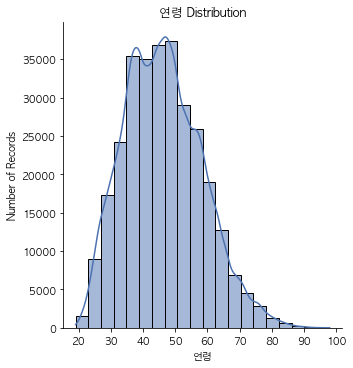

In [16]:
# 연령

column_name = '연령'
user_friendly_name = '연령'

# Get Details
get_column_details(df,column_name)

# Plot Graph
plot_displot(df,column_name,user_friendly_name,rotation=0,bins=20)

Details of 연령대 column

DataType:  category

There are no null values

Number of Unique Values:  9

Distribution of column:

40대       91043
30대       74047
50대       69369
60대       31564
20대       22765
70대        9382
80대        1678
80대 이상       94
10대          58
Name: 연령대, dtype: int64

-----------------------------------------------------

연령대 Distribution


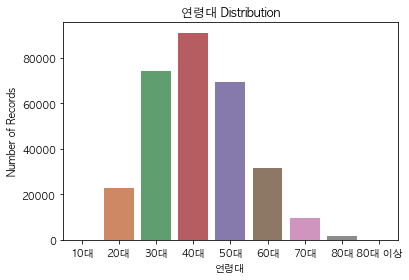


-----------------------------------------------------

연령대 & 고객구분 Distribution


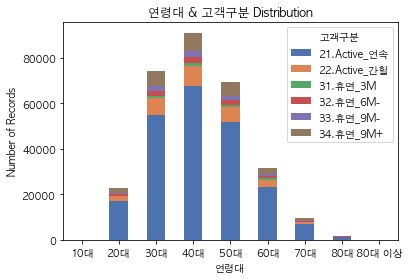

In [17]:
# 연령대

# 연속형 데이터 '연령'을 범주형 데이터 '연령대'로 labeling (pandas cut()함수 이용)
# '연령대'칼럼은 '연령'칼럼 앞에 value 모두 0으로 일단 삽입
df.insert(2,'연령대',[0 for x in range(300000)])
# 범주화
df['연령대'] = pd.cut(df['연령'],bins=[0,19,29,39,49,59,69,79,89,100],labels=['10대','20대','30대','40대','50대','60대','70대','80대','80대 이상'])


# # 내가 원하는대로 "연령대"column이 "연령"column 앞에 잘 추가되었나 확인
# df.iloc[:, 0:4]

column_name = '연령대'
user_friendly_name = '연령대'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

# Stacked bar
column1 = column_name
column2 = '고객구분'
plot_stacked_bar(df,column1,column2,rotation=0)

Details of 탈회여부 column

DataType:  int64

There are no null values

Number of Unique Values:  2

Distribution of column:

0    178046
1    121954
Name: 탈회여부, dtype: int64

-----------------------------------------------------

탈회여부 Distribution


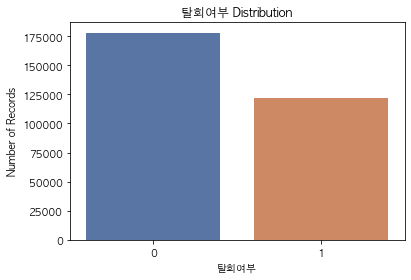

In [18]:
column_name = '탈회여부'
user_friendly_name = '탈회여부'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 남녀구분코드 column

DataType:  int64

There are no null values

Number of Unique Values:  2

Distribution of column:

1    157932
2    142068
Name: 남녀구분코드, dtype: int64

-----------------------------------------------------

남녀구분코드 Distribution


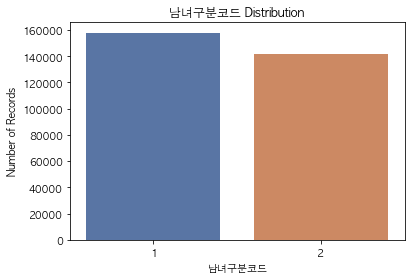

In [19]:
column_name = '남녀구분코드'
user_friendly_name = '남녀구분코드'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 소지여부_신용 column

DataType:  int64

There are no null values

Number of Unique Values:  2

Distribution of column:

1    293922
0      6078
Name: 소지여부_신용, dtype: int64

-----------------------------------------------------

소지여부_신용 Distribution


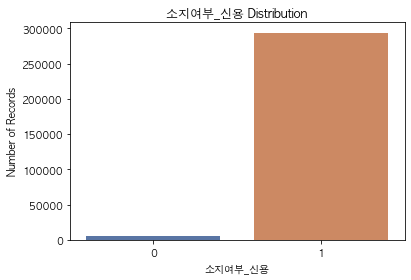

In [20]:
column_name = '소지여부_신용'
user_friendly_name = '소지여부_신용'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 입회일자_신용 column

DataType:  int64

There are no null values

Number of Unique Values:  8523

Distribution of column:

20070330    398
20180123    350
20171010    350
20180201    342
20180129    335
           ... 
19980922      1
19891220      1
20020427      1
19980410      1
19920411      1
Name: 입회일자_신용, Length: 8523, dtype: int64

-----------------------------------------------------

입회일자_신용 Distribution


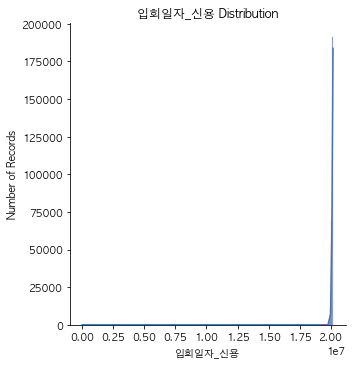

In [21]:
column_name = '입회일자_신용'
user_friendly_name = '입회일자_신용'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_displot(df,column_name,user_friendly_name,rotation=0,bins=300)

Details of 입회경과개월수_신용 column

DataType:  int64

There are no null values

Number of Unique Values:  423

Distribution of column:

12     5866
10     5687
14     5234
13     5139
17     5116
       ... 
443       1
437       1
422       1
429       1
0         1
Name: 입회경과개월수_신용, Length: 423, dtype: int64

-----------------------------------------------------

입회경과개월수_신용 Distribution


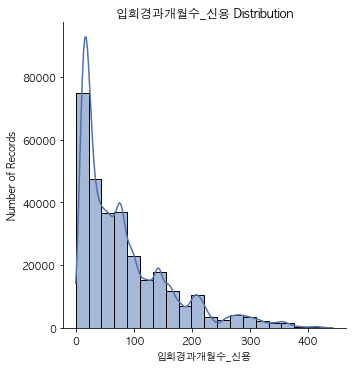

In [22]:
column_name = '입회경과개월수_신용'
user_friendly_name = '입회경과개월수_신용'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_displot(df,column_name,user_friendly_name,rotation=0,bins=20)

Details of 회원여부_연체 column

DataType:  int64

There are no null values

Number of Unique Values:  2

Distribution of column:

0    296097
1      3903
Name: 회원여부_연체, dtype: int64

-----------------------------------------------------

회원여부_연체 Distribution


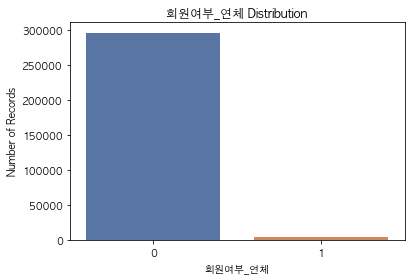

In [23]:
column_name = '회원여부_연체'
user_friendly_name = '회원여부_연체'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 수신거부여부_TM column

DataType:  int64

There are no null values

Number of Unique Values:  2

Distribution of column:

0    186041
1    113959
Name: 수신거부여부_TM, dtype: int64

-----------------------------------------------------

수신거부여부_TM Distribution


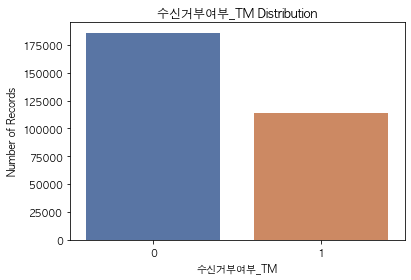

In [24]:
column_name = '수신거부여부_TM'
user_friendly_name = '수신거부여부_TM'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 수신거부여부_DM column

DataType:  int64

There are no null values

Number of Unique Values:  2

Distribution of column:

0    203088
1     96912
Name: 수신거부여부_DM, dtype: int64

-----------------------------------------------------

수신거부여부_DM Distribution


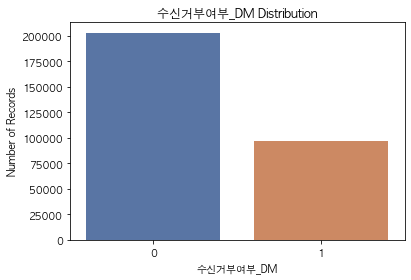

In [25]:
column_name = '수신거부여부_DM'
user_friendly_name = '수신거부여부_DM'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 수신거부여부_메일 column

DataType:  int64

There are no null values

Number of Unique Values:  2

Distribution of column:

0    201866
1     98134
Name: 수신거부여부_메일, dtype: int64

-----------------------------------------------------

수신거부여부_메일 Distribution


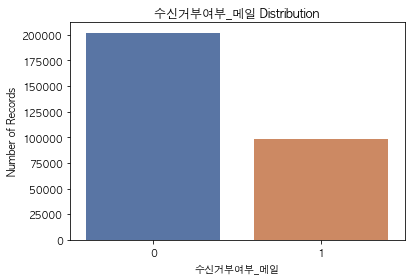

In [26]:
column_name = '수신거부여부_메일'
user_friendly_name = '수신거부여부_메일'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 수신거부여부_SMS column

DataType:  int64

There are no null values

Number of Unique Values:  2

Distribution of column:

0    187467
1    112533
Name: 수신거부여부_SMS, dtype: int64

-----------------------------------------------------

수신거부여부_SMS Distribution


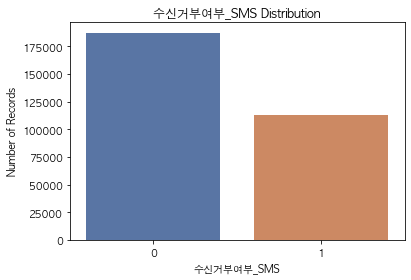

In [27]:
column_name = '수신거부여부_SMS'
user_friendly_name = '수신거부여부_SMS'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 자격기준 column

DataType:  object

There are no null values

Number of Unique Values:  13

Distribution of column:

06.기업체     79838
08.은행거래    78590
11.자영업자    62562
01.공무원     16083
02.교육기관    11310
04.의료기관    10215
12.체크전환    10166
99.기타       8921
10.배우자      7241
03.금융기관     6299
07.소기업      6284
09.전문직      1785
05.언론기관      706
Name: 자격기준, dtype: int64

-----------------------------------------------------

자격기준 Distribution


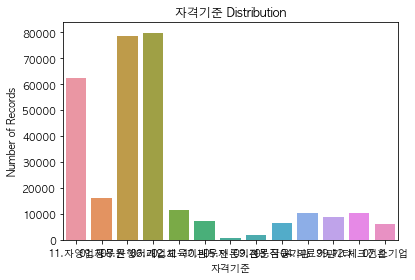

In [28]:
column_name = '자격기준'
user_friendly_name = '자격기준'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 자격구분상세 column

DataType:  object

There are no null values

Number of Unique Values:  44

Distribution of column:

08.은행거래_수신평잔                    61493
10.부동산보유                        35972
06.기업체_개인사업체임의단체연소득2.4천이상       24937
99.기타                           23101
06.기업체_납입자본금3억이상중소기업            20110
06.기업체_30대그룹계열사및상장법인            19073
06.기업체_납입자본금3억미만중소기업            13111
07.소기업                          12213
13.체크전환                         10166
01.공무원_일반                        8230
08.은행거래_부동산담보대출                  7925
11.배우자                           7241
01.공무원_정부투자공공기관                  6673
08.은행거래_신용대출                     6179
02.교육기관_초중고교사                    4840
04.의료기관_의료관련면허소시자                4113
04.의료기관                          3207
00.SK제휴사                         3099
14.사업소득                          3052
04.의료기관_의사약사한의사                  2895
03.금융기관_은행증권보험은행연합회              2662
06.기업체_코스닥등록기업                   2043
08.은행거래_급여이체                     2019


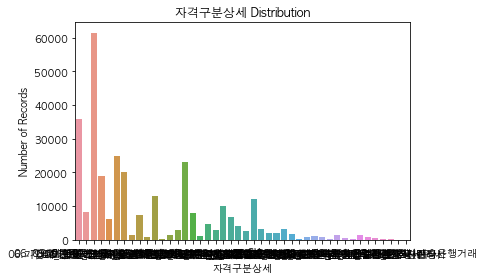

In [29]:
column_name = '자격구분상세'
user_friendly_name = '자격구분상세'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 연회비청구구분_B0M column

DataType:  object

There are no null values

Number of Unique Values:  4

Distribution of column:

4.미청구     274205
1.정상청구     19384
3.면제        5643
2.할인청구       768
Name: 연회비청구구분_B0M, dtype: int64

-----------------------------------------------------

연회비청구구분_B0M Distribution


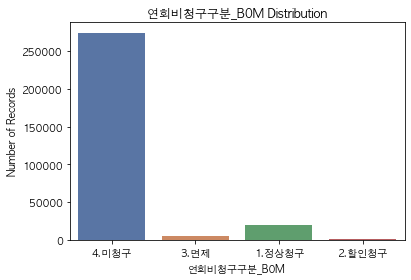

In [30]:
column_name = '연회비청구구분_B0M'
user_friendly_name = '연회비청구구분_B0M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of BL여부_R12M column

DataType:  int64

There are no null values

Number of Unique Values:  2

Distribution of column:

0    295761
1      4239
Name: BL여부_R12M, dtype: int64

-----------------------------------------------------

BL여부_R12M Distribution


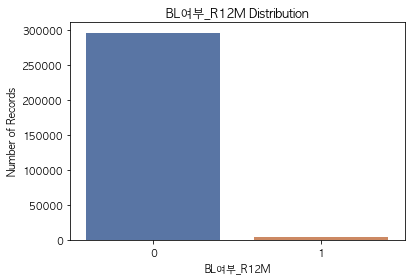

In [31]:
column_name = 'BL여부_R12M'
user_friendly_name = 'BL여부_R12M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 탈회횟수_누적 column

DataType:  int64

There are no null values

Number of Unique Values:  12

Distribution of column:

0     178046
1      94170
2      23184
3       3837
4        608
5        102
6         38
7         11
8          1
10         1
11         1
12         1
Name: 탈회횟수_누적, dtype: int64

-----------------------------------------------------

탈회횟수_누적 Distribution


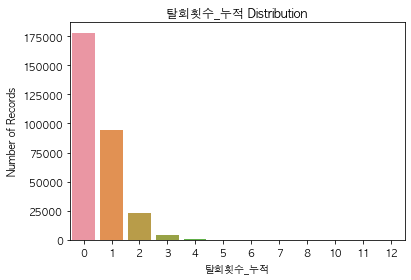

In [32]:
column_name = '탈회횟수_누적'
user_friendly_name = '탈회횟수_누적'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 탈회횟수_발급1년이내 column

DataType:  int64

There are no null values

Number of Unique Values:  10

Distribution of column:

0     280938
1      16597
2       1943
3        392
4         83
5         28
6         13
7          4
11         1
12         1
Name: 탈회횟수_발급1년이내, dtype: int64

-----------------------------------------------------

탈회횟수_발급1년이내 Distribution


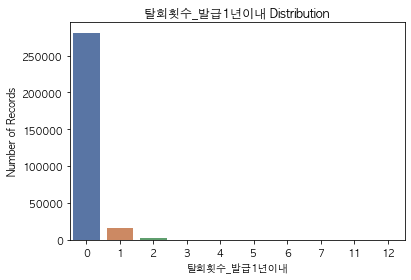

In [33]:
column_name = '탈회횟수_발급1년이내'
user_friendly_name = '탈회횟수_발급1년이내'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 거주시도명 column

DataType:  object

There are no null values

Number of Unique Values:  16

Distribution of column:

경기    83450
서울    83061
부산    17817
인천    16967
대전    16208
경남    12521
대구    11132
경북     9744
충남     9447
전북     7361
광주     7012
울산     6654
충북     5799
전남     5789
강원     4847
제주     2191
Name: 거주시도명, dtype: int64

-----------------------------------------------------

거주시도명 Distribution


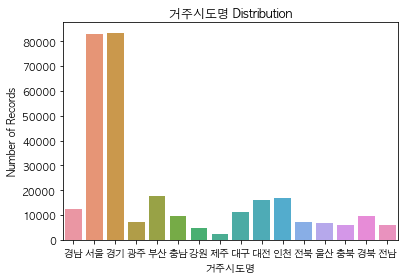

In [34]:
column_name = '거주시도명'
user_friendly_name = '거주시도명'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 거주시군구명 column

DataType:  object

There are no null values

Number of Unique Values:  210

Distribution of column:

서구     11222
성남시     8388
용인시     8334
고양시     8306
수원시     7944
       ...  
울릉군       16
당진군        4
청원군        3
마산시        1
여주군        1
Name: 거주시군구명, Length: 210, dtype: int64

-----------------------------------------------------

거주시군구명 Distribution


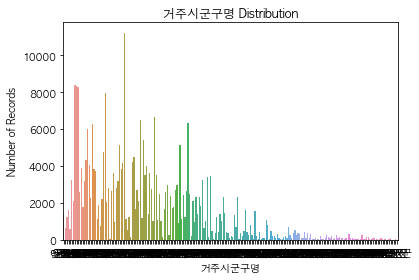

In [35]:
column_name = '거주시군구명'
user_friendly_name = '거주시군구명'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 직장시도명 column

DataType:  object

There are  55665  null values

Number of Unique Values:  17

Distribution of column:

서울    81913
경기    55254
부산    13575
대전    11723
인천    11579
경남    10324
경북     9180
충남     8542
대구     8392
전북     6227
울산     5669
광주     5326
전남     5102
충북     5093
강원     4166
제주     1773
세종      497
Name: 직장시도명, dtype: int64

-----------------------------------------------------

직장시도명 Distribution


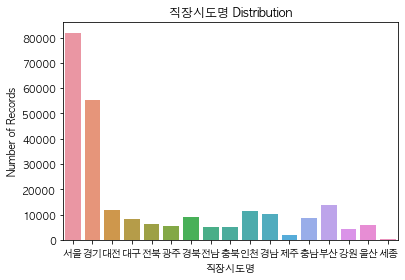

In [36]:
column_name = '직장시도명'
user_friendly_name = '직장시도명'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 직장시군구명 column

DataType:  object

There are  56162  null values

Number of Unique Values:  209

Distribution of column:

중구      13237
강남구     12748
서구       7806
서초구      7150
성남시      6772
        ...  
울릉군        16
영양군        15
여주군         1
청원군         1
북제주군        1
Name: 직장시군구명, Length: 209, dtype: int64

-----------------------------------------------------

직장시군구명 Distribution


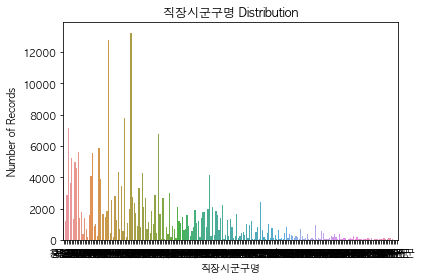

In [37]:
column_name = '직장시군구명'
user_friendly_name = '직장시군구명'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 마케팅동의여부 column

DataType:  int64

There are no null values

Number of Unique Values:  2

Distribution of column:

1    240503
0     59497
Name: 마케팅동의여부, dtype: int64

-----------------------------------------------------

마케팅동의여부 Distribution


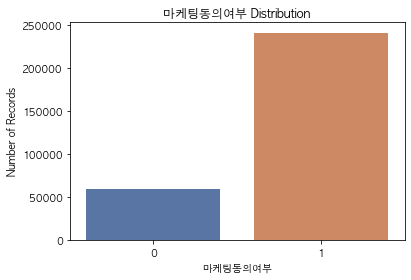

In [38]:
column_name = '마케팅동의여부'
user_friendly_name = '마케팅동의여부'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 유효카드수_신용체크 column

DataType:  int64

There are no null values

Number of Unique Values:  28

Distribution of column:

1     117811
2      92065
3      47798
4      22736
5      10454
6       4895
7       2110
8        991
9        522
10       256
11       150
12        77
13        55
14        27
15        14
16        13
18         9
17         4
19         2
20         2
25         2
21         1
24         1
26         1
27         1
28         1
31         1
37         1
Name: 유효카드수_신용체크, dtype: int64

-----------------------------------------------------

유효카드수_신용체크 Distribution


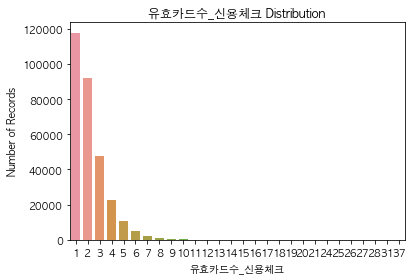


-----------------------------------------------------

유효카드수_신용체크 Distribution


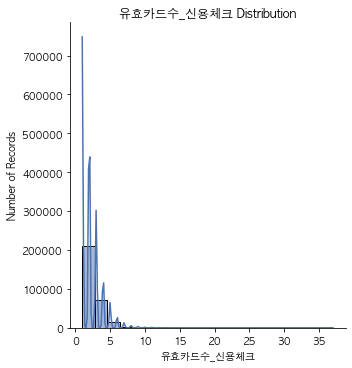

In [39]:
column_name = '유효카드수_신용체크'
user_friendly_name = '유효카드수_신용체크'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

# Plot Graph
plot_displot(df,column_name,user_friendly_name,rotation=0,bins=20)

Details of 유효카드수_신용 column

DataType:  int64

There are no null values

Number of Unique Values:  23

Distribution of column:

1     183340
2      74630
3      22153
4       8256
0       6078
5       3300
6       1235
7        505
8        253
9        108
10        62
11        27
12        22
13        15
14         6
15         2
17         2
18         1
20         1
24         1
26         1
30         1
32         1
Name: 유효카드수_신용, dtype: int64

-----------------------------------------------------

유효카드수_신용 Distribution


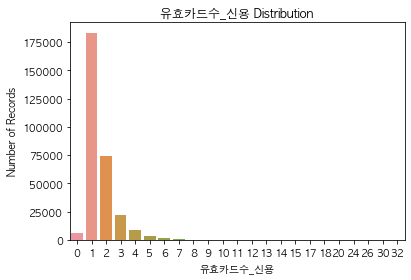

In [40]:
column_name = '유효카드수_신용'
user_friendly_name = '유효카드수_신용'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 유효카드수_체크 column

DataType:  int64

There are no null values

Number of Unique Values:  16

Distribution of column:

0     173989
1      84999
2      27281
3       8959
4       3061
5       1073
6        400
7        136
8         59
9         24
10         7
11         5
14         4
12         1
16         1
18         1
Name: 유효카드수_체크, dtype: int64

-----------------------------------------------------

유효카드수_체크 Distribution


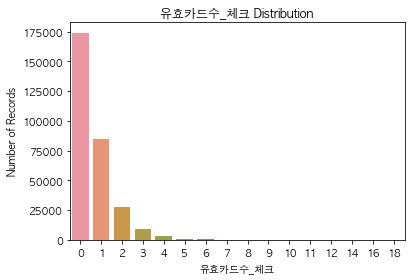

In [41]:
column_name = '유효카드수_체크'
user_friendly_name = '유효카드수_체크'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용금액_R3M_신용체크 column

DataType:  int64

There are no null values

Number of Unique Values:  196913

Distribution of column:

0          45960
900         6398
1800        1667
2700        1462
600         1012
           ...  
2934210        1
3448265        1
1344970        1
822731         1
1576958        1
Name: 이용금액_R3M_신용체크, Length: 196913, dtype: int64

-----------------------------------------------------

이용금액_R3M_신용체크 Distribution


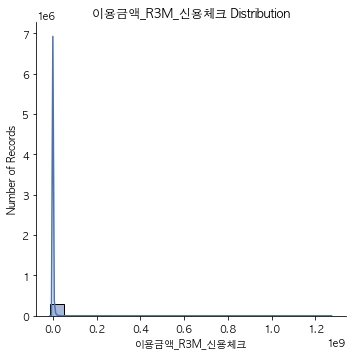

In [42]:
column_name = '이용금액_R3M_신용체크'
user_friendly_name = '이용금액_R3M_신용체크'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_displot(df,column_name,user_friendly_name,rotation=0,bins=20)

Details of 이용금액_R3M_신용 column

DataType:  int64

There are no null values

Number of Unique Values:  186521

Distribution of column:

0          51863
900         7364
1800        1891
2700        1635
600         1194
           ...  
2486247        1
5085160        1
4055370        1
1423340        1
1703650        1
Name: 이용금액_R3M_신용, Length: 186521, dtype: int64

-----------------------------------------------------

이용금액_R3M_신용 Distribution


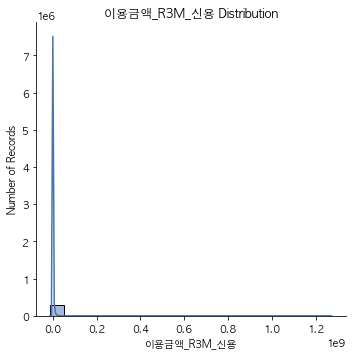

In [43]:
column_name = '이용금액_R3M_신용'
user_friendly_name = '이용금액_R3M_신용'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_displot(df,column_name,user_friendly_name,rotation=0,bins=20)

Details of 이용금액_R3M_체크 column

DataType:  int64

There are no null values

Number of Unique Values:  38902

Distribution of column:

0          250898
10000         107
4500           96
30000          95
50000          81
            ...  
552020          1
130150          1
1162350         1
613490          1
1093610         1
Name: 이용금액_R3M_체크, Length: 38902, dtype: int64

-----------------------------------------------------

이용금액_R3M_체크 Distribution


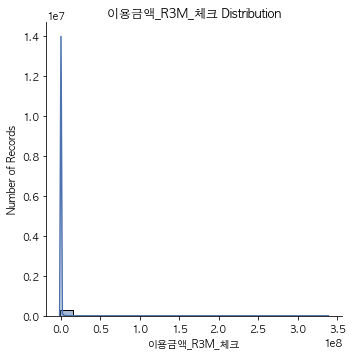

In [44]:
column_name = '이용금액_R3M_체크'
user_friendly_name = '이용금액_R3M_체크'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_displot(df,column_name,user_friendly_name,rotation=0,bins=20)

In [45]:
column_name = '_1순위카드ID'
user_friendly_name = '_1순위카드ID'

#Get Details
get_column_details(df,column_name)



Details of _1순위카드ID column

DataType:  int64

There are no null values

Number of Unique Values:  1743

Distribution of column:

136     18737
156     17092
229     11856
1561     9769
126      9097
        ...  
362         1
620         1
1644        1
365         1
256         1
Name: _1순위카드ID, Length: 1743, dtype: int64


Details of _1순위카드이용금액 column

DataType:  int64

There are no null values

Number of Unique Values:  181490

Distribution of column:

0          52030
900         9201
2700        2175
600         1235
300         1077
           ...  
851140         1
1369287        1
3980492        1
1334480        1
4724733        1
Name: _1순위카드이용금액, Length: 181490, dtype: int64

-----------------------------------------------------

_1순위카드이용금액 Distribution


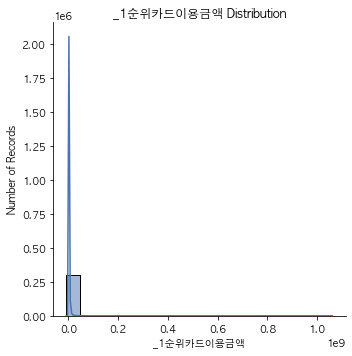

In [46]:
column_name = '_1순위카드이용금액'
user_friendly_name = '_1순위카드이용금액'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_displot(df,column_name,user_friendly_name,rotation=0,bins=20)

Details of _1순위카드이용건수 column

DataType:  int64

There are no null values

Number of Unique Values:  572

Distribution of column:

0      52044
3      24766
1       7896
6       7710
2       6484
       ...  
574        1
478        1
596        1
477        1
511        1
Name: _1순위카드이용건수, Length: 572, dtype: int64

-----------------------------------------------------

_1순위카드이용건수 Distribution


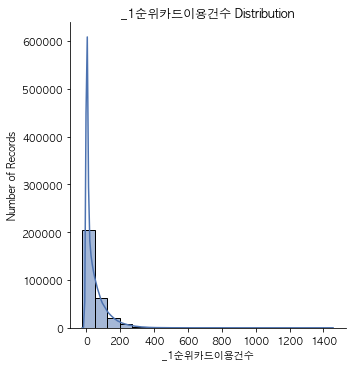

In [47]:
column_name = '_1순위카드이용건수'
user_friendly_name = '_1순위카드이용건수'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_displot(df,column_name,user_friendly_name,rotation=0,bins=20)

Details of _1순위신용체크구분 column

DataType:  object

There are no null values

Number of Unique Values:  2

Distribution of column:

신용    284204
체크     15796
Name: _1순위신용체크구분, dtype: int64

-----------------------------------------------------

_1순위신용체크구분 Distribution


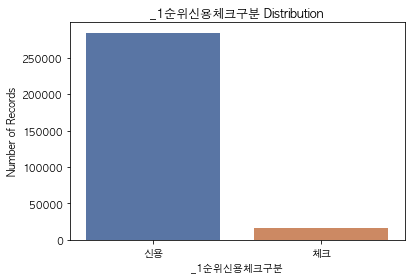

In [48]:
column_name = '_1순위신용체크구분'
user_friendly_name = '_1순위신용체크구분'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 기본연회비_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  65

Distribution of column:

0         275303
5000        6767
10000       4754
8000        3545
12000       2356
           ...  
34000          1
90000          1
135000         1
200000         1
31000          1
Name: 기본연회비_B0M, Length: 65, dtype: int64

-----------------------------------------------------

기본연회비_B0M Distribution


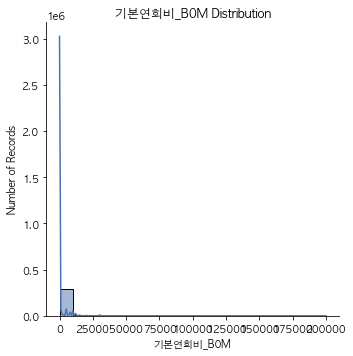

In [49]:
column_name = '기본연회비_B0M'
user_friendly_name = '기본연회비_B0M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_displot(df,column_name,user_friendly_name,rotation=0,bins=20)

Details of Life_Stage column

DataType:  object

There are no null values

Number of Unique Values:  7

Distribution of column:

4.자녀성장기(1)    99160
5.자녀성장기(2)    74692
3.자녀출산기       30693
2.가족형성기       29736
7.노령          29532
6.자녀출가기       25365
1.Single      10822
Name: Life_Stage, dtype: int64

-----------------------------------------------------

Life_Stage Distribution


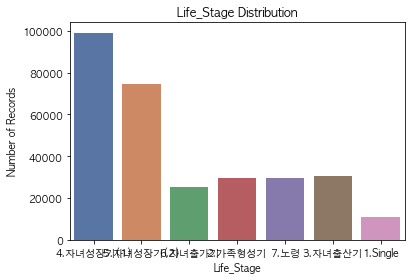

In [50]:
column_name = 'Life_Stage'
user_friendly_name = 'Life_Stage'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 카드이용한도금액 column

DataType:  int64

There are no null values

Number of Unique Values:  426

Distribution of column:

1000000     35283
5000000     26726
3000000     20076
10000000    19889
0           12576
            ...  
33700000        1
98500000        1
35200000        1
4350000         1
86000000        1
Name: 카드이용한도금액, Length: 426, dtype: int64

-----------------------------------------------------

카드이용한도금액 Distribution


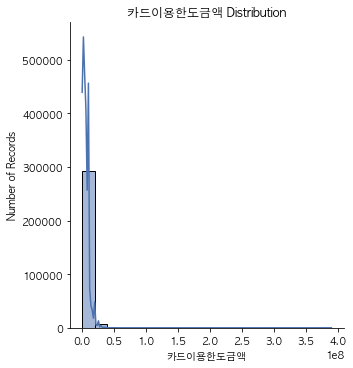

In [51]:
column_name = '카드이용한도금액'
user_friendly_name = '카드이용한도금액'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_displot(df,column_name,user_friendly_name,rotation=0,bins=20)

Details of 고객구분 column

DataType:  object

There are no null values

Number of Unique Values:  6

Distribution of column:

21.Active_연속    222863
22.Active_간헐     29035
34.휴면_9M+        26974
32.휴면_6M-         8951
33.휴면_9M-         7638
31.휴면_3M          4539
Name: 고객구분, dtype: int64

-----------------------------------------------------

고객구분 Distribution


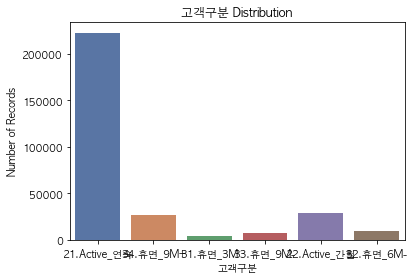

In [52]:
column_name = '고객구분'
user_friendly_name = '고객구분'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용건수_신판_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  271

Distribution of column:

0      63342
1      38614
2      15407
3      10361
4       8272
       ...  
295        1
236        1
237        1
209        1
350        1
Name: 이용건수_신판_B0M, Length: 271, dtype: int64

-----------------------------------------------------

이용건수_신판_B0M Distribution


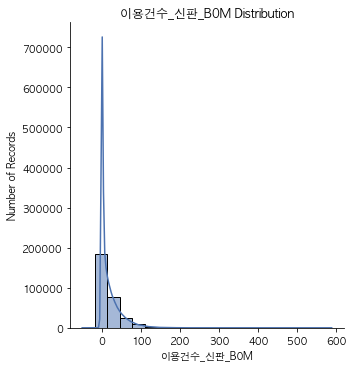

In [53]:
column_name = '이용건수_신판_B0M'
user_friendly_name = '이용건수_신판_B0M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_displot(df,column_name,user_friendly_name,rotation=0,bins=20)

Details of 이용건수_일시불_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  268

Distribution of column:

0      65083
1      39314
2      15368
3      10244
4       8345
       ...  
229        1
230        1
262        1
264        1
351        1
Name: 이용건수_일시불_B0M, Length: 268, dtype: int64

-----------------------------------------------------

이용건수_일시불_B0M Distribution


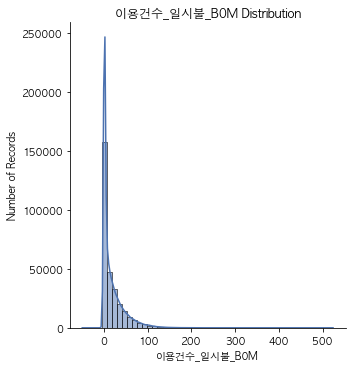

In [54]:
column_name = '이용건수_일시불_B0M'
user_friendly_name = '이용건수_일시불_B0M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_displot(df,column_name,user_friendly_name,rotation=0,bins=50)

Details of 이용건수_할부_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  47

Distribution of column:

 0     252108
 1      25742
 2      10180
 3       4842
 4       2555
 5       1487
 6        865
-1        700
 7        501
 8        280
 9        187
 10       128
 11        80
-2         80
 12        50
 13        44
-3         27
 15        22
 14        18
 16        10
 18        10
-4         10
 23         8
 19         7
-5          6
-6          6
 17         5
 20         5
 22         4
 24         4
 25         4
 29         3
-7          3
-8          2
-9          2
 28         2
 32         2
 21         2
 70         1
-14         1
 64         1
 41         1
 40         1
 37         1
 33         1
 27         1
 67         1
Name: 이용건수_할부_B0M, dtype: int64

-----------------------------------------------------

이용건수_할부_B0M Distribution


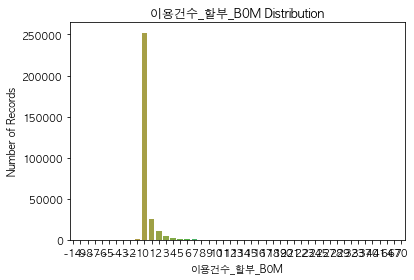

In [55]:
column_name = '이용건수_할부_B0M'
user_friendly_name = '이용건수_할부_B0M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용건수_할부_유이자_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  27

Distribution of column:

 0     281472
 1      12436
 2       3277
 3       1231
 4        507
-1        497
 5        227
 6        115
-2         62
 7         60
 8         37
-3         21
 9         17
 10        13
 11         6
-4          5
 13         3
 12         3
-6          2
 15         2
 24         1
 29         1
-61         1
-8          1
-5          1
 14         1
 20         1
Name: 이용건수_할부_유이자_B0M, dtype: int64

-----------------------------------------------------

이용건수_할부_유이자_B0M Distribution


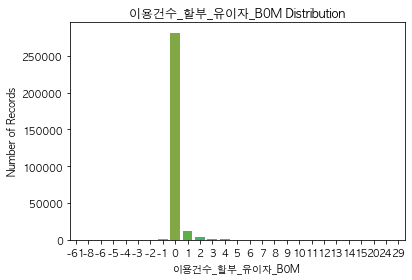


-----------------------------------------------------

이용건수_할부_유이자_B0M Distribution


/Users/youngzi/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/youngzi/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


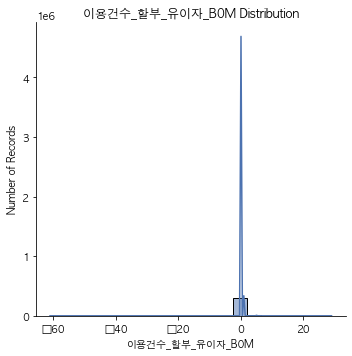

In [56]:
column_name = '이용건수_할부_유이자_B0M'
user_friendly_name = '이용건수_할부_유이자_B0M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

# Plot Graph
plot_displot(df,column_name,user_friendly_name,rotation=0,bins=20)

Details of 이용건수_할부_무이자_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  48

Distribution of column:

 0     263495
 1      20974
 2       7401
 3       3301
 4       1681
 5        935
-1        677
 6        540
 7        285
 8        183
 9        109
 10        83
-2         77
 11        47
 12        42
-3         24
 13        24
 15        18
 14        16
-4         11
 18        10
 23         6
 16         6
 20         5
 17         5
-5          5
 22         4
-6          4
-7          3
 24         3
 19         3
 21         3
-9          2
 25         2
 29         2
-8          2
 33         1
 27         1
 31         1
 32         1
-10         1
-14         1
 69         1
 67         1
 64         1
 41         1
 40         1
 28         1
Name: 이용건수_할부_무이자_B0M, dtype: int64

-----------------------------------------------------

이용건수_할부_무이자_B0M Distribution


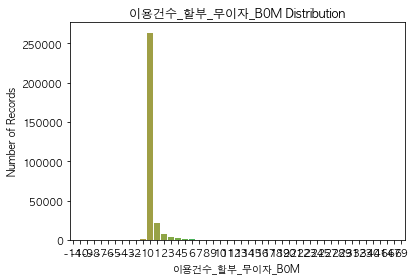


-----------------------------------------------------

이용건수_할부_무이자_B0M Distribution


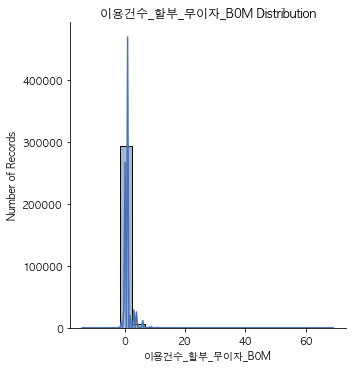

In [57]:
column_name = '이용건수_할부_무이자_B0M'
user_friendly_name = '이용건수_할부_무이자_B0M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

# Plot Graph
plot_displot(df,column_name,user_friendly_name,rotation=0,bins=20)

Details of 이용건수_부분무이자_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  10

Distribution of column:

 0     299427
 1        451
 2         61
-1         29
 3         21
 4          5
-2          3
 5          1
 6          1
 61         1
Name: 이용건수_부분무이자_B0M, dtype: int64

-----------------------------------------------------

이용건수_부분무이자_B0M Distribution


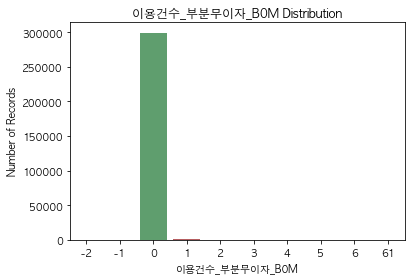

In [58]:
column_name = '이용건수_부분무이자_B0M'
user_friendly_name = '이용건수_부분무이자_B0M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용건수_CA_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  21

Distribution of column:

0     284877
1       9163
2       3459
3       1360
4        574
5        280
6        131
7         57
8         38
9         17
10        15
11         9
12         7
15         4
13         2
14         2
16         1
18         1
20         1
24         1
25         1
Name: 이용건수_CA_B0M, dtype: int64

-----------------------------------------------------

이용건수_CA_B0M Distribution


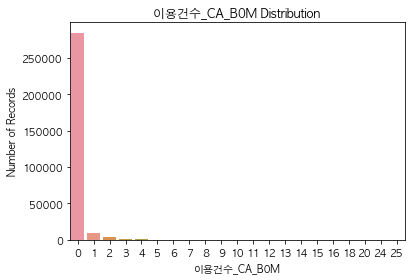

In [59]:
column_name = '이용건수_CA_B0M'
user_friendly_name = '이용건수_CA_B0M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [60]:
column_name = '이용건수_체크_B0M'
user_friendly_name = '이용건수_체크_B0M'

#Get Details
get_column_details(df,column_name)


Details of 이용건수_체크_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  191

Distribution of column:

0      259808
1        5588
2        3168
3        2187
4        1744
        ...  
145         1
140         1
282         1
131         1
348         1
Name: 이용건수_체크_B0M, Length: 191, dtype: int64


Details of 이용건수_카드론_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  8

Distribution of column:

0    297998
1      1756
2       202
3        23
4        11
6         4
5         3
7         3
Name: 이용건수_카드론_B0M, dtype: int64

-----------------------------------------------------

이용건수_카드론_B0M Distribution


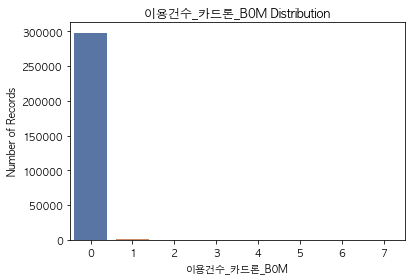

In [61]:
column_name = '이용건수_카드론_B0M'
user_friendly_name = '이용건수_카드론_B0M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용금액_신용_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  141163

Distribution of column:

0          62014
300        15096
900         2868
1000         755
3300         384
           ...  
1414610        1
353740         1
1932698        1
345544         1
1052670        1
Name: 이용금액_신용_B0M, Length: 141163, dtype: int64

-----------------------------------------------------

이용금액_신용_B0M Distribution


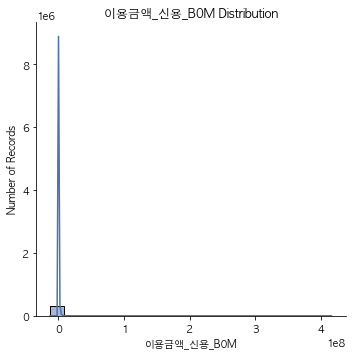

In [62]:
column_name = '이용금액_신용_B0M'
user_friendly_name = '이용금액_신용_B0M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_displot(df,column_name,user_friendly_name,rotation=0,bins=20)

In [63]:
column_name = '이용금액_신판_B0M'
user_friendly_name = '이용금액_신판_B0M'

#Get Details
get_column_details(df,column_name)



Details of 이용금액_신판_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  137377

Distribution of column:

0          63240
300        15298
900         2976
1000         759
3300         399
           ...  
773466         1
10110          1
662880         1
18290          1
1052670        1
Name: 이용금액_신판_B0M, Length: 137377, dtype: int64


In [64]:
column_name = '이용금액_일시불_B0M'
user_friendly_name = '이용금액_일시불_B0M'

#Get Details
get_column_details(df,column_name)


Details of 이용금액_일시불_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  129357

Distribution of column:

0          65047
300        15563
900         3119
1000         769
3300         430
           ...  
530785         1
4448           1
1175900        1
641371         1
1052670        1
Name: 이용금액_일시불_B0M, Length: 129357, dtype: int64


In [65]:
column_name = '이용금액_할부_B0M'
user_friendly_name = '이용금액_할부_B0M'

#Get Details
get_column_details(df,column_name)


Details of 이용금액_할부_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  26005

Distribution of column:

0          251326
300000        412
200000        228
100000        215
500000        202
            ...  
1796400         1
661790          1
149780          1
190720          1
5881800         1
Name: 이용금액_할부_B0M, Length: 26005, dtype: int64


In [66]:
column_name = '이용금액_할부_유이자_B0M'
user_friendly_name = '이용금액_할부_유이자_B0M'

#Get Details
get_column_details(df,column_name)


Details of 이용금액_할부_유이자_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  9282

Distribution of column:

0         281303
300000       364
200000       184
500000       182
100000       168
           ...  
992447         1
89200          1
64580          1
52290          1
450340         1
Name: 이용금액_할부_유이자_B0M, Length: 9282, dtype: int64


In [67]:
column_name = '이용금액_할부_무이자_B0M'
user_friendly_name = '이용금액_할부_무이자_B0M'

#Get Details
get_column_details(df,column_name)


Details of 이용금액_할부_무이자_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  20932

Distribution of column:

0         262696
99000        207
100000       146
300000       145
79000        140
           ...  
990910         1
995000         1
949906         1
85620          1
122820         1
Name: 이용금액_할부_무이자_B0M, Length: 20932, dtype: int64


In [68]:
column_name = '이용금액_부분무이자_B0M'
user_friendly_name = '이용금액_부분무이자_B0M'

#Get Details
get_column_details(df,column_name)


Details of 이용금액_부분무이자_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  551

Distribution of column:

0          299406
1500000         5
1000000         5
990000          4
880000          4
            ...  
206640          1
172800          1
1171560         1
2305590         1
307050          1
Name: 이용금액_부분무이자_B0M, Length: 551, dtype: int64


In [69]:
column_name = '이용금액_CA_B0M'
user_friendly_name = '이용금액_CA_B0M'

#Get Details
get_column_details(df,column_name)


Details of 이용금액_CA_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  768

Distribution of column:

0          284877
2000000       848
1000000       842
200000        757
300000        724
            ...  
1110060         1
29336           1
4240000         1
3780000         1
769928          1
Name: 이용금액_CA_B0M, Length: 768, dtype: int64


In [70]:
column_name = '이용금액_체크_B0M'
user_friendly_name = '이용금액_체크_B0M'

#Get Details
get_column_details(df,column_name)


Details of 이용금액_체크_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  28930

Distribution of column:

0          259781
4500          105
10000          98
900            93
20000          89
            ...  
114762          1
894440          1
796120          1
1353160         1
20470           1
Name: 이용금액_체크_B0M, Length: 28930, dtype: int64


In [71]:
column_name = '이용금액_카드론_B0M'
user_friendly_name = '이용금액_카드론_B0M'

#Get Details
get_column_details(df,column_name)


Details of 이용금액_카드론_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  400

Distribution of column:

0           297998
5000000        199
2000000        150
1000000        111
3000000         89
             ...  
8150000          1
550000           1
20900000         1
13300000         1
12930000         1
Name: 이용금액_카드론_B0M, Length: 400, dtype: int64


Details of 이용후경과월_신용 column

DataType:  int64

There are no null values

Number of Unique Values:  13

Distribution of column:

0     237508
12     24932
1       8844
2       5546
3       4539
4       3309
5       2951
6       2691
7       2394
8       2038
9       1832
10      1790
11      1626
Name: 이용후경과월_신용, dtype: int64

-----------------------------------------------------

이용후경과월_신용 Distribution


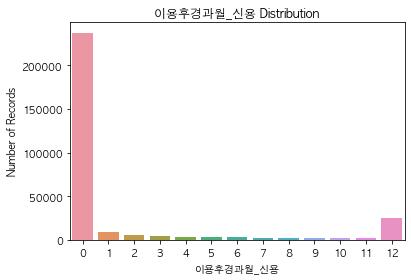

In [72]:
column_name = '이용후경과월_신용'
user_friendly_name = '이용후경과월_신용'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용후경과월_신판 column

DataType:  int64

There are no null values

Number of Unique Values:  13

Distribution of column:

0     237508
12     24932
1       8844
2       5546
3       4539
4       3309
5       2951
6       2691
7       2394
8       2038
9       1832
10      1790
11      1626
Name: 이용후경과월_신판, dtype: int64

-----------------------------------------------------

이용후경과월_신판 Distribution


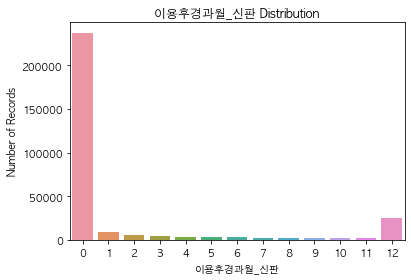

In [73]:
column_name = '이용후경과월_신판'
user_friendly_name = '이용후경과월_신판'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용후경과월_일시불 column

DataType:  int64

There are no null values

Number of Unique Values:  13

Distribution of column:

0     234417
12     26643
1       9298
2       5820
3       4782
4       3474
5       3015
6       2739
7       2436
8       2019
9       1868
10      1828
11      1661
Name: 이용후경과월_일시불, dtype: int64

-----------------------------------------------------

이용후경과월_일시불 Distribution


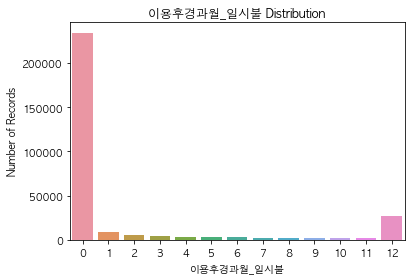

In [74]:
column_name = '이용후경과월_일시불'
user_friendly_name = '이용후경과월_일시불'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용후경과월_할부 column

DataType:  int64

There are no null values

Number of Unique Values:  13

Distribution of column:

12    158848
0      47672
1      20898
2      13812
3       9651
4       7934
5       7592
6       6824
7       6269
8       5595
9       5308
11      4990
10      4607
Name: 이용후경과월_할부, dtype: int64

-----------------------------------------------------

이용후경과월_할부 Distribution


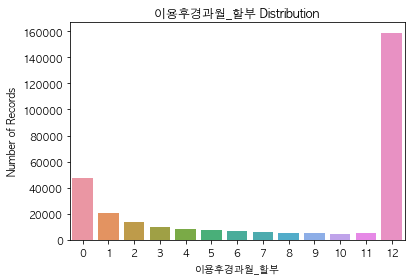

In [75]:
column_name = '이용후경과월_할부'
user_friendly_name = '이용후경과월_할부'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용후경과월_할부_유이자 column

DataType:  int64

There are no null values

Number of Unique Values:  13

Distribution of column:

12    229098
0      17995
1      10717
2       8320
3       6209
4       5482
5       5421
11      3145
6       2958
7       2792
9       2751
8       2668
10      2444
Name: 이용후경과월_할부_유이자, dtype: int64

-----------------------------------------------------

이용후경과월_할부_유이자 Distribution


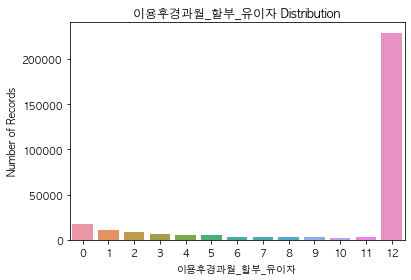

In [76]:
column_name = '이용후경과월_할부_유이자'
user_friendly_name = '이용후경과월_할부_유이자'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용후경과월_할부_무이자 column

DataType:  int64

There are no null values

Number of Unique Values:  13

Distribution of column:

12    172110
0      36354
1      17660
2      12183
3       9065
6       8373
7       7402
4       7334
5       7219
8       6447
9       5844
11      5119
10      4890
Name: 이용후경과월_할부_무이자, dtype: int64

-----------------------------------------------------

이용후경과월_할부_무이자 Distribution


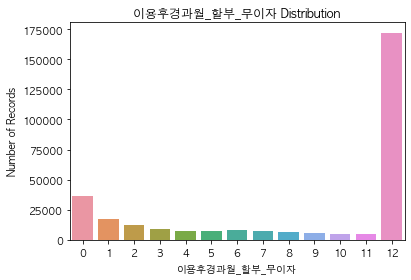

In [77]:
column_name = '이용후경과월_할부_무이자'
user_friendly_name = '이용후경과월_할부_무이자'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용후경과월_부분무이자 column

DataType:  int64

There are no null values

Number of Unique Values:  13

Distribution of column:

12    293858
9        613
6        579
7        573
8        568
0        566
11       551
1        537
2        508
10       446
5        438
4        395
3        368
Name: 이용후경과월_부분무이자, dtype: int64

-----------------------------------------------------

이용후경과월_부분무이자 Distribution


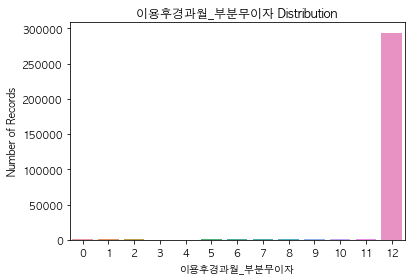

In [78]:
column_name = '이용후경과월_부분무이자'
user_friendly_name = '이용후경과월_부분무이자'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용후경과월_CA column

DataType:  int64

There are no null values

Number of Unique Values:  13

Distribution of column:

12    258679
0      15123
1       5328
2       3593
3       2531
4       2419
5       2202
6       2021
7       1908
8       1706
9       1586
11      1545
10      1359
Name: 이용후경과월_CA, dtype: int64

-----------------------------------------------------

이용후경과월_CA Distribution


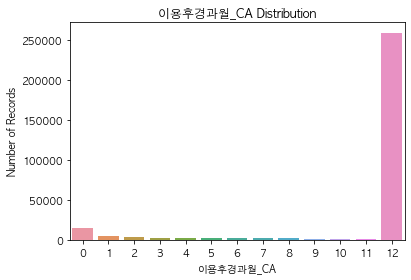

In [79]:
column_name = '이용후경과월_CA'
user_friendly_name = '이용후경과월_CA'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용후경과월_체크 column

DataType:  int64

There are no null values

Number of Unique Values:  13

Distribution of column:

12    231938
0      40120
1       5764
2       4034
3       3036
4       2573
5       2416
6       2006
7       1866
8       1684
9       1602
10      1492
11      1469
Name: 이용후경과월_체크, dtype: int64

-----------------------------------------------------

이용후경과월_체크 Distribution


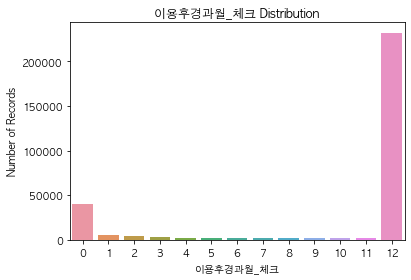

In [80]:
column_name = '이용후경과월_체크'
user_friendly_name = '이용후경과월_체크'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용후경과월_카드론 column

DataType:  int64

There are no null values

Number of Unique Values:  13

Distribution of column:

12    280005
2       2141
1       2094
0       2002
4       1644
3       1614
5       1574
6       1540
7       1532
11      1532
8       1506
10      1439
9       1377
Name: 이용후경과월_카드론, dtype: int64

-----------------------------------------------------

이용후경과월_카드론 Distribution


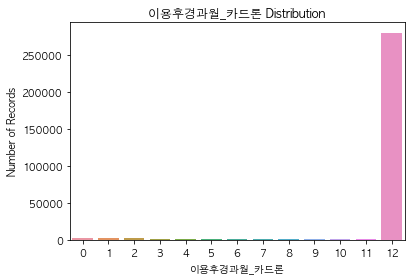

In [81]:
column_name = '이용후경과월_카드론'
user_friendly_name = '이용후경과월_카드론'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용건수_신용_R12M column

DataType:  int64

There are no null values

Number of Unique Values:  2066

Distribution of column:

0       25015
12       9693
1        4387
2        3120
13       2771
        ...  
1691        1
1946        1
1690        1
1944        1
1791        1
Name: 이용건수_신용_R12M, Length: 2066, dtype: int64

-----------------------------------------------------

이용건수_신용_R12M Distribution


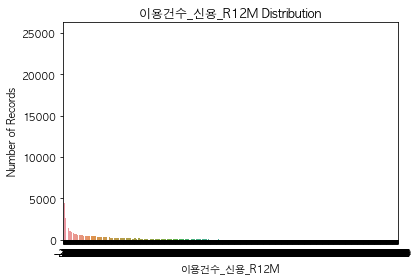

In [82]:
column_name = '이용건수_신용_R12M'
user_friendly_name = '이용건수_신용_R12M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [83]:
column_name = '이용건수_신판_R12M'
user_friendly_name = '이용건수_신판_R12M'

#Get Details
get_column_details(df,column_name)


Details of 이용건수_신판_R12M column

DataType:  int64

There are no null values

Number of Unique Values:  2068

Distribution of column:

0       25584
12       9832
1        4548
2        3222
13       2814
        ...  
2114        1
1741        1
2764        1
2508        1
2047        1
Name: 이용건수_신판_R12M, Length: 2068, dtype: int64


In [84]:
column_name = '이용건수_일시불_R12M'
user_friendly_name = '이용건수_일시불_R12M'

#Get Details
get_column_details(df,column_name)


Details of 이용건수_일시불_R12M column

DataType:  int64

There are no null values

Number of Unique Values:  2046

Distribution of column:

 0       26734
 12      10191
 1        4574
 2        3347
 13       2811
         ...  
 1654        1
 1910        1
 1912        1
 6114        1
-25          1
Name: 이용건수_일시불_R12M, Length: 2046, dtype: int64


In [85]:
column_name = '이용건수_할부_R12M'
user_friendly_name = '이용건수_할부_R12M'

#Get Details
get_column_details(df,column_name)

Details of 이용건수_할부_R12M column

DataType:  int64

There are no null values

Number of Unique Values:  209

Distribution of column:

0      159881
1       34304
2       18946
3       13202
4        9798
        ...  
178         1
182         1
441         1
187         1
289         1
Name: 이용건수_할부_R12M, Length: 209, dtype: int64


In [86]:
column_name = '이용건수_할부_유이자_R12M'
user_friendly_name = '이용건수_할부_유이자_R12M'

#Get Details
get_column_details(df,column_name)

Details of 이용건수_할부_유이자_R12M column

DataType:  int64

There are no null values

Number of Unique Values:  117

Distribution of column:

 0      228678
 1       29610
 2       11998
 3        6999
 4        4547
         ...  
-52          1
 173         1
-118         1
 130         1
-40          1
Name: 이용건수_할부_유이자_R12M, Length: 117, dtype: int64


In [87]:
column_name = '이용건수_할부_무이자_R12M'
user_friendly_name = '이용건수_할부_무이자_R12M'

#Get Details
get_column_details(df,column_name)

Details of 이용건수_할부_무이자_R12M column

DataType:  int64

There are no null values

Number of Unique Values:  201

Distribution of column:

0      173162
1       34552
2       19075
3       12681
4        9281
        ...  
177         1
178         1
179         1
441         1
261         1
Name: 이용건수_할부_무이자_R12M, Length: 201, dtype: int64


In [88]:
column_name = '이용건수_부분무이자_R12M'
user_friendly_name = '이용건수_부분무이자_R12M'

#Get Details
get_column_details(df,column_name)

Details of 이용건수_부분무이자_R12M column

DataType:  int64

There are no null values

Number of Unique Values:  36

Distribution of column:

 0      294039
 1        4324
 2         916
 3         266
 4         118
 5          85
-1          62
 6          45
 7          28
-2          17
 8          17
 9          14
 10         13
 12         12
 13          7
 11          5
 16          5
 14          3
 15          3
-5           2
 30          2
 29          2
 17          2
-6           1
-3           1
 53          1
 119         1
 77          1
 23          1
 38          1
 36          1
 28          1
 24          1
 21          1
 19          1
 18          1
Name: 이용건수_부분무이자_R12M, dtype: int64


In [89]:
column_name = '이용건수_CA_R12M'
user_friendly_name = '이용건수_CA_R12M'

#Get Details
get_column_details(df,column_name)

Details of 이용건수_CA_R12M column

DataType:  int64

There are no null values

Number of Unique Values:  115

Distribution of column:

0      258680
1        9787
2        5231
3        3509
4        2639
        ...  
92          1
86          1
83          1
80          1
230         1
Name: 이용건수_CA_R12M, Length: 115, dtype: int64


In [90]:
column_name = '이용건수_체크_R12M'
user_friendly_name = '이용건수_체크_R12M'

#Get Details
get_column_details(df,column_name)

Details of 이용건수_체크_R12M column

DataType:  int64

There are no null values

Number of Unique Values:  1315

Distribution of column:

0       231961
1         5233
2         3032
3         2107
4         1757
         ...  
1419         1
1071         1
1120         1
1219         1
1279         1
Name: 이용건수_체크_R12M, Length: 1315, dtype: int64


In [91]:
column_name = '이용건수_카드론_R12M'
user_friendly_name = '이용건수_카드론_R12M'

#Get Details
get_column_details(df,column_name)

Details of 이용건수_카드론_R12M column

DataType:  int64

There are no null values

Number of Unique Values:  27

Distribution of column:

0     280005
1      12622
2       4281
3       1665
4        690
5        306
6        165
7         80
8         44
9         37
10        26
11        19
12        14
14        10
15         9
16         8
13         6
19         2
24         2
36         2
17         1
18         1
21         1
28         1
30         1
47         1
66         1
Name: 이용건수_카드론_R12M, dtype: int64


In [92]:
column_name = '이용금액_신용_R12M'
user_friendly_name = '이용금액_신용_R12M'

#Get Details
get_column_details(df,column_name)

Details of 이용금액_신용_R12M column

DataType:  int64

There are no null values

Number of Unique Values:  244501

Distribution of column:

0          24977
9000        3911
10800       1226
2100         889
1200         563
           ...  
3912737        1
3910690        1
9641820        1
6546475        1
2101246        1
Name: 이용금액_신용_R12M, Length: 244501, dtype: int64


In [93]:
column_name = '이용금액_신판_R12M'
user_friendly_name = '이용금액_신판_R12M'

#Get Details
get_column_details(df,column_name)

Details of 이용금액_신판_R12M column

DataType:  int64

There are no null values

Number of Unique Values:  242669

Distribution of column:

0          25544
9000        3985
10800       1279
2100         920
1200         580
           ...  
3746930        1
413730         1
1641590        1
4260983        1
2101246        1
Name: 이용금액_신판_R12M, Length: 242669, dtype: int64


In [94]:
column_name = '이용금액_일시불_R12M'
user_friendly_name = '이용금액_일시불_R12M'

#Get Details
get_column_details(df,column_name)

Details of 이용금액_일시불_R12M column

DataType:  int64

There are no null values

Number of Unique Values:  236948

Distribution of column:

0          26699
9000        4148
10800       1344
2100        1006
1200         650
           ...  
927123         1
4066710        1
5637527        1
1998232        1
1052670        1
Name: 이용금액_일시불_R12M, Length: 236948, dtype: int64


In [95]:
column_name = '이용금액_할부_R12M'
user_friendly_name = '이용금액_할부_R12M'

#Get Details
get_column_details(df,column_name)

Details of 이용금액_할부_R12M column

DataType:  int64

There are no null values

Number of Unique Values:  97793

Distribution of column:

0          159231
408000        721
300000        527
360000        456
384000        351
            ...  
1460370         1
2531471         1
440460          1
4638850         1
1052670         1
Name: 이용금액_할부_R12M, Length: 97793, dtype: int64


In [96]:
column_name = '이용금액_할부_유이자_R12M'
user_friendly_name = '이용금액_할부_유이자_R12M'

#Get Details
get_column_details(df,column_name)

Details of 이용금액_할부_유이자_R12M column

DataType:  int64

There are no null values

Number of Unique Values:  38476

Distribution of column:

0          227675
408000       1375
300000        793
384000        624
500000        449
            ...  
304840          1
2410180         1
1894080         1
1533616         1
1114080         1
Name: 이용금액_할부_유이자_R12M, Length: 38476, dtype: int64


In [97]:
column_name = '이용금액_할부_무이자_R12M'
user_friendly_name = '이용금액_할부_무이자_R12M'

#Get Details
get_column_details(df,column_name)

Details of 이용금액_할부_무이자_R12M column

DataType:  int64

There are no null values

Number of Unique Values:  87509

Distribution of column:

0          172466
360000        330
300000        293
1000000       271
500000        224
            ...  
8655321         1
1339861         1
1858000         1
6597070         1
1052670         1
Name: 이용금액_할부_무이자_R12M, Length: 87509, dtype: int64


In [98]:
column_name = '이용금액_부분무이자_R12M'
user_friendly_name = '이용금액_부분무이자_R12M'

#Get Details
get_column_details(df,column_name)

Details of 이용금액_부분무이자_R12M column

DataType:  int64

There are no null values

Number of Unique Values:  4334

Distribution of column:

0          293898
1000000       111
2000000        78
500000         50
3000000        39
            ...  
143646          1
1405430         1
312000          1
3720000         1
5259000         1
Name: 이용금액_부분무이자_R12M, Length: 4334, dtype: int64


In [99]:
column_name = '이용금액_CA_R12M'
user_friendly_name = '이용금액_CA_R12M'

#Get Details
get_column_details(df,column_name)

Details of 이용금액_CA_R12M column

DataType:  int64

There are no null values

Number of Unique Values:  4914

Distribution of column:

0           258679
100000        1301
200000        1269
300000        1164
1000000       1001
             ...  
34180000         1
2704569          1
1145344          1
210167           1
103600           1
Name: 이용금액_CA_R12M, Length: 4914, dtype: int64


In [100]:
column_name = '이용금액_체크_R12M'
user_friendly_name = '이용금액_체크_R12M'

#Get Details
get_column_details(df,column_name)

Details of 이용금액_체크_R12M column

DataType:  int64

There are no null values

Number of Unique Values:  57878

Distribution of column:

0           231931
10000          207
30000          101
4500            98
50000           93
             ...  
19793            1
5258591          1
116064           1
7460194          1
12077047         1
Name: 이용금액_체크_R12M, Length: 57878, dtype: int64


In [101]:
column_name = '이용금액_카드론_R12M'
user_friendly_name = '이용금액_카드론_R12M'

#Get Details
get_column_details(df,column_name)

Details of 이용금액_카드론_R12M column

DataType:  int64

There are no null values

Number of Unique Values:  3026

Distribution of column:

0           280005
5000000       1642
2000000        875
10000000       848
4000000        687
             ...  
5090000          1
18193110         1
6247311          1
15740000         1
24150000         1
Name: 이용금액_카드론_R12M, Length: 3026, dtype: int64


Details of 이용개월수_신용_R12M column

DataType:  int64

There are no null values

Number of Unique Values:  13

Distribution of column:

12    179356
0      24932
11     18685
10     12919
9      10046
7       9289
8       9054
1       7199
6       6392
2       5993
5       5466
4       5416
3       5253
Name: 이용개월수_신용_R12M, dtype: int64

-----------------------------------------------------

이용개월수_신용_R12M Distribution


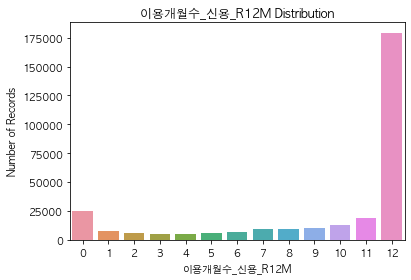

In [102]:
column_name = '이용개월수_신용_R12M'
user_friendly_name = '이용개월수_신용_R12M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용개월수_신판_R12M column

DataType:  int64

There are no null values

Number of Unique Values:  13

Distribution of column:

12    177519
0      25498
11     18690
10     12953
9      10113
7       9419
8       9187
1       7467
6       6497
2       6165
5       5585
4       5507
3       5400
Name: 이용개월수_신판_R12M, dtype: int64

-----------------------------------------------------

이용개월수_신판_R12M Distribution


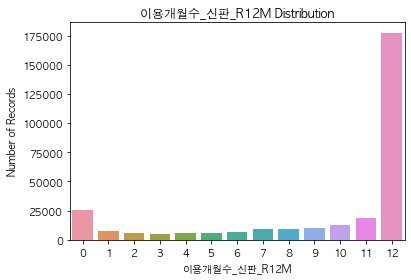

In [103]:
column_name = '이용개월수_신판_R12M'
user_friendly_name = '이용개월수_신판_R12M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용개월수_일시불_R12M column

DataType:  int64

There are no null values

Number of Unique Values:  13

Distribution of column:

12    174495
0      26643
11     19097
10     13039
9      10238
7       9550
8       9224
1       7682
6       6708
2       6350
4       5743
5       5715
3       5516
Name: 이용개월수_일시불_R12M, dtype: int64

-----------------------------------------------------

이용개월수_일시불_R12M Distribution


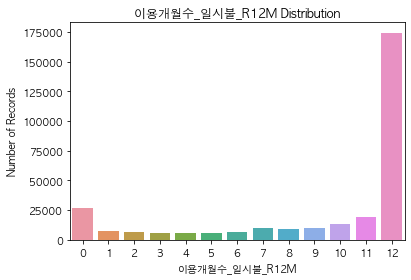

In [104]:
column_name = '이용개월수_일시불_R12M'
user_friendly_name = '이용개월수_일시불_R12M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용개월수_할부_R12M column

DataType:  int64

There are no null values

Number of Unique Values:  13

Distribution of column:

0     158848
1      39420
2      22328
3      16018
4      12150
5      10041
6       8569
7       7313
8       6214
9       5422
10      4922
12      4441
11      4314
Name: 이용개월수_할부_R12M, dtype: int64

-----------------------------------------------------

이용개월수_할부_R12M Distribution


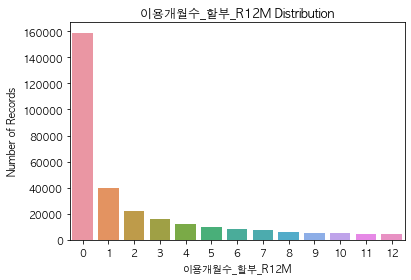

In [105]:
column_name = '이용개월수_할부_R12M'
user_friendly_name = '이용개월수_할부_R12M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용개월수_할부_유이자_R12M column

DataType:  int64

There are no null values

Number of Unique Values:  13

Distribution of column:

0     229098
1      33634
2      13785
3       7686
4       4858
5       3351
6       2263
7       1756
8       1250
9        895
10       640
11       479
12       305
Name: 이용개월수_할부_유이자_R12M, dtype: int64

-----------------------------------------------------

이용개월수_할부_유이자_R12M Distribution


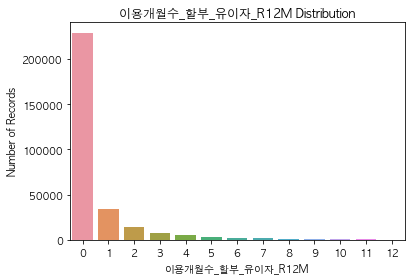

In [106]:
column_name = '이용개월수_할부_유이자_R12M'
user_friendly_name = '이용개월수_할부_유이자_R12M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용개월수_할부_무이자_R12M column

DataType:  int64

There are no null values

Number of Unique Values:  13

Distribution of column:

0     172110
1      39774
2      22280
3      15044
4      11271
5       8939
6       7147
7       5869
8       4703
9       3881
10      3377
11      2866
12      2739
Name: 이용개월수_할부_무이자_R12M, dtype: int64

-----------------------------------------------------

이용개월수_할부_무이자_R12M Distribution


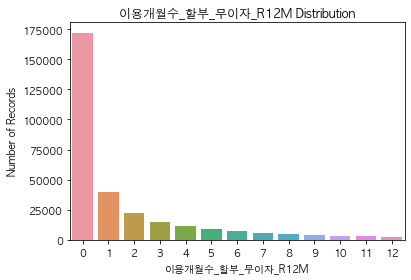

In [107]:
column_name = '이용개월수_할부_무이자_R12M'
user_friendly_name = '이용개월수_할부_무이자_R12M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용개월수_부분무이자_R12M column

DataType:  int64

There are no null values

Number of Unique Values:  13

Distribution of column:

0     293858
1       4901
2        789
3        223
4         91
5         62
6         33
7         16
8          8
9          6
10         5
11         4
12         4
Name: 이용개월수_부분무이자_R12M, dtype: int64

-----------------------------------------------------

이용개월수_부분무이자_R12M Distribution


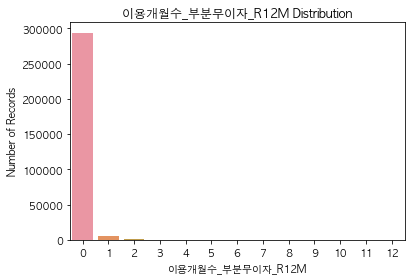

In [108]:
column_name = '이용개월수_부분무이자_R12M'
user_friendly_name = '이용개월수_부분무이자_R12M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용개월수_CA_R12M column

DataType:  int64

There are no null values

Number of Unique Values:  13

Distribution of column:

0     258679
1      12040
2       5818
3       3962
4       3161
5       2519
6       2266
12      2258
7       1979
8       1849
9       1838
11      1834
10      1797
Name: 이용개월수_CA_R12M, dtype: int64

-----------------------------------------------------

이용개월수_CA_R12M Distribution


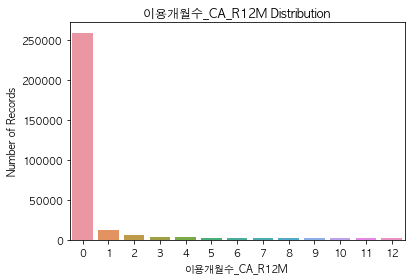

In [109]:
column_name = '이용개월수_CA_R12M'
user_friendly_name = '이용개월수_CA_R12M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용개월수_체크_R12M column

DataType:  int64

There are no null values

Number of Unique Values:  13

Distribution of column:

0     231938
12     21427
1       9257
2       5964
11      4601
3       4316
4       3702
10      3556
5       3259
9       3144
6       3004
7       2945
8       2887
Name: 이용개월수_체크_R12M, dtype: int64

-----------------------------------------------------

이용개월수_체크_R12M Distribution


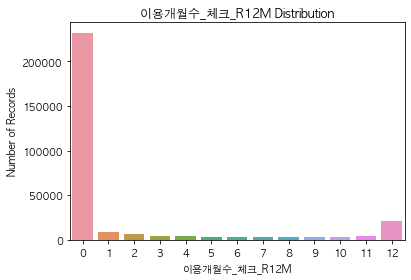

In [110]:
column_name = '이용개월수_체크_R12M'
user_friendly_name = '이용개월수_체크_R12M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용개월수_카드론_R12M column

DataType:  int64

There are no null values

Number of Unique Values:  13

Distribution of column:

0     280005
1      13934
2       4122
3       1186
4        436
5        160
6         75
7         35
8         22
9         11
10         6
11         6
12         2
Name: 이용개월수_카드론_R12M, dtype: int64

-----------------------------------------------------

이용개월수_카드론_R12M Distribution


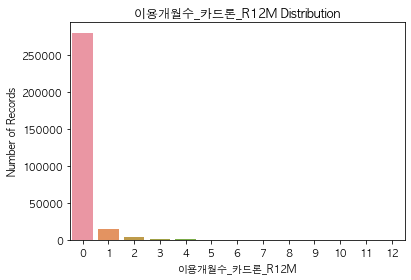

In [111]:
column_name = '이용개월수_카드론_R12M'
user_friendly_name = '이용개월수_카드론_R12M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [112]:
column_name = '이용건수_신용_R6M'
user_friendly_name = '이용건수_신용_R6M'

#Get Details
get_column_details(df,column_name)

Details of 이용건수_신용_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  1195

Distribution of column:

0       37338
6       16631
1        5388
12       4206
7        4152
        ...  
1123        1
1119        1
1118        1
1117        1
1279        1
Name: 이용건수_신용_R6M, Length: 1195, dtype: int64


In [113]:
column_name = '이용건수_신판_R6M'
user_friendly_name = '이용건수_신판_R6M'

#Get Details
get_column_details(df,column_name)

Details of 이용건수_신판_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  1194

Distribution of column:

0       38069
6       16870
1        5557
12       4196
7        4135
        ...  
970         1
1076        1
1740        1
1587        1
1279        1
Name: 이용건수_신판_R6M, Length: 1194, dtype: int64


In [114]:
column_name = '이용건수_일시불_R6M'
user_friendly_name = '이용건수_일시불_R6M'

#Get Details
get_column_details(df,column_name)

Details of 이용건수_일시불_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  1181

Distribution of column:

0       39226
6       17445
1        5702
12       4244
2        4192
        ...  
1176        1
921         1
1177        1
1180        1
1023        1
Name: 이용건수_일시불_R6M, Length: 1181, dtype: int64


In [115]:
column_name = '이용건수_할부_R6M'
user_friendly_name = '이용건수_할부_R6M'

#Get Details
get_column_details(df,column_name)

Details of 이용건수_할부_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  137

Distribution of column:

0      193323
1       31773
2       17297
3       11461
4        8146
        ...  
139         1
143         1
154         1
163         1
270         1
Name: 이용건수_할부_R6M, Length: 137, dtype: int64


In [116]:
column_name = '이용건수_할부_유이자_R6M'
user_friendly_name = '이용건수_할부_유이자_R6M'

#Get Details
get_column_details(df,column_name)

Details of 이용건수_할부_유이자_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  77

Distribution of column:

 0     245519
 1      24197
 2      10011
 3       5684
 4       3469
        ...  
 63         1
 60         1
 58         1
 57         1
-16         1
Name: 이용건수_할부_유이자_R6M, Length: 77, dtype: int64


In [117]:
column_name = '이용건수_할부_무이자_R6M'
user_friendly_name = '이용건수_할부_무이자_R6M'

#Get Details
get_column_details(df,column_name)

Details of 이용건수_할부_무이자_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  132

Distribution of column:

0      211086
1       30752
2       15645
3        9733
4        6473
        ...  
133         1
134         1
135         1
138         1
270         1
Name: 이용건수_할부_무이자_R6M, Length: 132, dtype: int64


In [118]:
column_name = '이용건수_CA_R6M'
user_friendly_name = '이용건수_CA_R6M'

#Get Details
get_column_details(df,column_name)

Details of 이용건수_CA_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  72

Distribution of column:

0      268804
1        8157
2        4542
3        3143
6        2644
        ...  
56          1
53          1
52          1
49          1
125         1
Name: 이용건수_CA_R6M, Length: 72, dtype: int64


In [119]:
column_name = '이용건수_체크_R6M'
user_friendly_name = '이용건수_체크_R6M'

#Get Details
get_column_details(df,column_name)

Details of 이용건수_체크_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  789

Distribution of column:

0      242067
1        4980
2        2868
3        2046
6        1653
        ...  
923         1
668         1
669         1
670         1
767         1
Name: 이용건수_체크_R6M, Length: 789, dtype: int64


In [120]:
column_name = '이용건수_카드론_R6M'
user_friendly_name = '이용건수_카드론_R6M'

#Get Details
get_column_details(df,column_name)

Details of 이용건수_카드론_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  18

Distribution of column:

0     288931
1       7995
2       2106
3        586
4        177
5         75
6         55
7         28
8         18
10         8
11         5
12         4
9          4
14         3
17         2
15         1
20         1
44         1
Name: 이용건수_카드론_R6M, dtype: int64


In [121]:
column_name = '이용금액_신용_R6M'
user_friendly_name = '이용금액_신용_R6M'

#Get Details
get_column_details(df,column_name)

Details of 이용금액_신용_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  218353

Distribution of column:

0           37293
3600         4862
1800         1871
5400         1701
1200         1093
            ...  
583236          1
14147263        1
2131528         1
502866          1
265920          1
Name: 이용금액_신용_R6M, Length: 218353, dtype: int64


In [122]:
column_name = '이용금액_신판_R6M'
user_friendly_name = '이용금액_신판_R6M'

#Get Details
get_column_details(df,column_name)

Details of 이용금액_신판_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  216003

Distribution of column:

0           38026
3600         4934
1800         1917
5400         1768
1200         1125
            ...  
18083621        1
7571240         1
757545          1
2336556         1
265920          1
Name: 이용금액_신판_R6M, Length: 216003, dtype: int64


In [123]:
column_name = '이용금액_일시불_R6M'
user_friendly_name = '이용금액_일시불_R6M'

#Get Details
get_column_details(df,column_name)

Details of 이용금액_일시불_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  209358

Distribution of column:

0          39193
3600        5066
1800        2021
5400        1866
1200        1195
           ...  
2386900        1
2913239        1
797660         1
8141790        1
6828026        1
Name: 이용금액_일시불_R6M, Length: 209358, dtype: int64


In [124]:
column_name = '이용금액_할부_R6M'
user_friendly_name = '이용금액_할부_R6M'

#Get Details
get_column_details(df,column_name)

Details of 이용금액_할부_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  69736

Distribution of column:

0          192578
300000        492
408000        336
500000        280
1000000       269
            ...  
212540          1
577090          1
2158150         1
1609290         1
557040          1
Name: 이용금액_할부_R6M, Length: 69736, dtype: int64


In [125]:
column_name = '이용금액_할부_유이자_R6M'
user_friendly_name = '이용금액_할부_유이자_R6M'

#Get Details
get_column_details(df,column_name)

Details of 이용금액_할부_유이자_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  29633

Distribution of column:

0          245002
300000        653
408000        614
500000        378
200000        353
            ...  
304840          1
2410180         1
1894080         1
1619530         1
3694580         1
Name: 이용금액_할부_유이자_R6M, Length: 29633, dtype: int64


In [126]:
column_name = '이용금액_할부_무이자_R6M'
user_friendly_name = '이용금액_할부_무이자_R6M'

#Get Details
get_column_details(df,column_name)

Details of 이용금액_할부_무이자_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  57935

Distribution of column:

0          210190
300000        221
99000         220
200000        174
79000         161
            ...  
580935          1
1074512         1
3147100         1
6935910         1
1265464         1
Name: 이용금액_할부_무이자_R6M, Length: 57935, dtype: int64


In [127]:
column_name = '이용금액_부분무이자_R6M'
user_friendly_name = '이용금액_부분무이자_R6M'

#Get Details
get_column_details(df,column_name)

Details of 이용금액_부분무이자_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  2319

Distribution of column:

0          297165
1000000        39
2000000        26
500000         18
700000         12
            ...  
1678950         1
2715000         1
159000          1
1531070         1
2234301         1
Name: 이용금액_부분무이자_R6M, Length: 2319, dtype: int64


In [128]:
column_name = '이용금액_CA_R6M'
user_friendly_name = '이용금액_CA_R6M'

#Get Details
get_column_details(df,column_name)

Details of 이용금액_CA_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  2867

Distribution of column:

0           268804
200000        1041
100000        1012
300000        1005
1000000        918
             ...  
13660000         1
24080000         1
26209            1
13430000         1
4840900          1
Name: 이용금액_CA_R6M, Length: 2867, dtype: int64


In [129]:
column_name = '이용금액_체크_R6M'
user_friendly_name = '이용금액_체크_R6M'

#Get Details
get_column_details(df,column_name)

Details of 이용금액_체크_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  47965

Distribution of column:

0          242041
10000         153
4500          120
30000          98
50000          85
            ...  
4180640         1
1030830         1
481970          1
1534644         1
20470           1
Name: 이용금액_체크_R6M, Length: 47965, dtype: int64


In [130]:
column_name = '이용금액_카드론_R6M'
user_friendly_name = '이용금액_카드론_R6M'

#Get Details
get_column_details(df,column_name)

Details of 이용금액_카드론_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  1662

Distribution of column:

0           288931
5000000        944
2000000        576
10000000       476
4000000        425
             ...  
2140000          1
24991454         1
2630000          1
13050000         1
32972060         1
Name: 이용금액_카드론_R6M, Length: 1662, dtype: int64


Details of 이용개월수_신용_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  7

Distribution of column:

6    210108
0     37303
5     16200
4     10872
1      9278
2      8388
3      7851
Name: 이용개월수_신용_R6M, dtype: int64

-----------------------------------------------------

이용개월수_신용_R6M Distribution


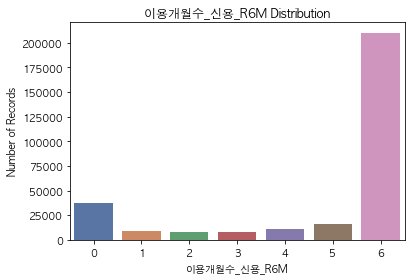

In [131]:
column_name = '이용개월수_신용_R6M'
user_friendly_name = '이용개월수_신용_R6M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용개월수_신판_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  7

Distribution of column:

6    208360
0     38035
5     16315
4     11086
1      9552
2      8590
3      8062
Name: 이용개월수_신판_R6M, dtype: int64

-----------------------------------------------------

이용개월수_신판_R6M Distribution


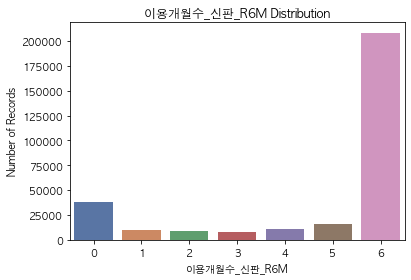

In [132]:
column_name = '이용개월수_신판_R6M'
user_friendly_name = '이용개월수_신판_R6M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용개월수_일시불_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  7

Distribution of column:

6    205754
0     39194
5     16672
4     11409
1      9905
2      8842
3      8224
Name: 이용개월수_일시불_R6M, dtype: int64

-----------------------------------------------------

이용개월수_일시불_R6M Distribution


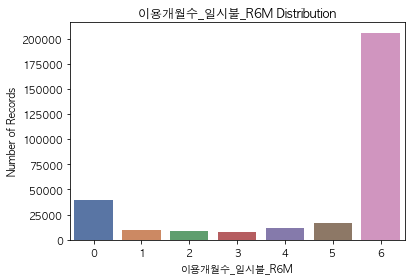

In [133]:
column_name = '이용개월수_일시불_R6M'
user_friendly_name = '이용개월수_일시불_R6M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용개월수_할부_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  7

Distribution of column:

0    192441
1     38321
2     21960
3     15578
4     12220
5      9931
6      9549
Name: 이용개월수_할부_R6M, dtype: int64

-----------------------------------------------------

이용개월수_할부_R6M Distribution


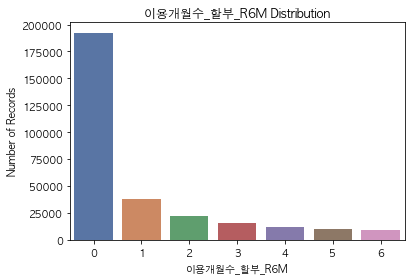

In [134]:
column_name = '이용개월수_할부_R6M'
user_friendly_name = '이용개월수_할부_R6M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용개월수_할부_유이자_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  7

Distribution of column:

0    245856
1     28495
2     11758
3      6322
4      3712
5      2327
6      1530
Name: 이용개월수_할부_유이자_R6M, dtype: int64

-----------------------------------------------------

이용개월수_할부_유이자_R6M Distribution


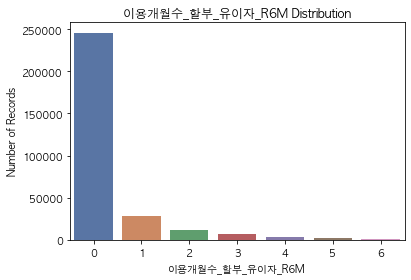

In [135]:
column_name = '이용개월수_할부_유이자_R6M'
user_friendly_name = '이용개월수_할부_유이자_R6M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용개월수_할부_무이자_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  7

Distribution of column:

0    210185
1     36765
2     19130
3     12371
4      8991
5      6735
6      5823
Name: 이용개월수_할부_무이자_R6M, dtype: int64

-----------------------------------------------------

이용개월수_할부_무이자_R6M Distribution


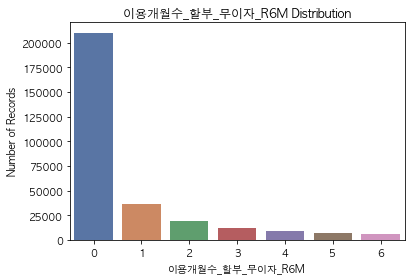

In [136]:
column_name = '이용개월수_할부_무이자_R6M'
user_friendly_name = '이용개월수_할부_무이자_R6M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용개월수_부분무이자_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  7

Distribution of column:

0    297188
1      2365
2       298
3        90
4        34
5        16
6         9
Name: 이용개월수_부분무이자_R6M, dtype: int64

-----------------------------------------------------

이용개월수_부분무이자_R6M Distribution


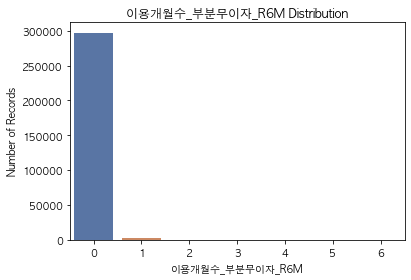

In [137]:
column_name = '이용개월수_부분무이자_R6M'
user_friendly_name = '이용개월수_부분무이자_R6M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용개월수_CA_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  7

Distribution of column:

0    268804
1     10258
2      5342
6      4367
3      4027
5      3603
4      3599
Name: 이용개월수_CA_R6M, dtype: int64

-----------------------------------------------------

이용개월수_CA_R6M Distribution


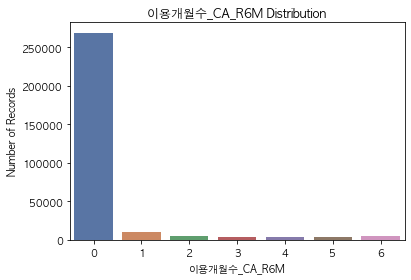

In [138]:
column_name = '이용개월수_CA_R6M'
user_friendly_name = '이용개월수_CA_R6M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용개월수_체크_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  7

Distribution of column:

0    242057
6     26978
1      9472
2      6057
5      5717
3      5018
4      4701
Name: 이용개월수_체크_R6M, dtype: int64

-----------------------------------------------------

이용개월수_체크_R6M Distribution


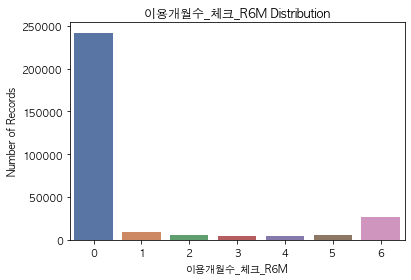

In [139]:
column_name = '이용개월수_체크_R6M'
user_friendly_name = '이용개월수_체크_R6M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용개월수_카드론_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  7

Distribution of column:

0    288931
1      8928
2      1658
3       347
4        85
5        38
6        13
Name: 이용개월수_카드론_R6M, dtype: int64

-----------------------------------------------------

이용개월수_카드론_R6M Distribution


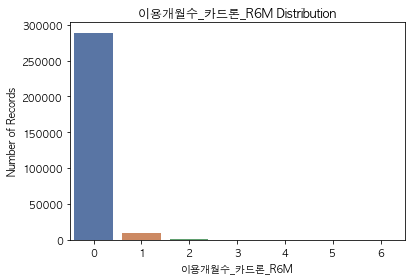

In [140]:
column_name = '이용개월수_카드론_R6M'
user_friendly_name = '이용개월수_카드론_R6M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [141]:
column_name = '이용건수_신용_R3M'
user_friendly_name = '이용건수_신용_R3M'

#Get Details
get_column_details(df,column_name)

Details of 이용건수_신용_R3M column

DataType:  int64

There are no null values

Number of Unique Values:  672

Distribution of column:

 0      48062
 3      23633
 6       7231
 1       6594
 4       5957
        ...  
 547        1
 587        1
 714        1
-29         1
 562        1
Name: 이용건수_신용_R3M, Length: 672, dtype: int64


In [142]:
column_name = '이용건수_신판_R3M'
user_friendly_name = '이용건수_신판_R3M'

#Get Details
get_column_details(df,column_name)

Details of 이용건수_신판_R3M column

DataType:  int64

There are no null values

Number of Unique Values:  675

Distribution of column:

0      48982
3      23945
6       7153
1       6778
4       5898
       ...  
589        1
715        1
592        1
714        1
562        1
Name: 이용건수_신판_R3M, Length: 675, dtype: int64


In [143]:
column_name = '이용건수_일시불_R3M'
user_friendly_name = '이용건수_일시불_R3M'

#Get Details
get_column_details(df,column_name)

Details of 이용건수_일시불_R3M column

DataType:  int64

There are no null values

Number of Unique Values:  679

Distribution of column:

0      50410
3      24597
6       7208
1       6945
4       5866
       ...  
626        1
768        1
631        1
636        1
647        1
Name: 이용건수_일시불_R3M, Length: 679, dtype: int64


In [144]:
column_name = '이용건수_할부_R3M'
user_friendly_name = '이용건수_할부_R3M'

#Get Details
get_column_details(df,column_name)

Details of 이용건수_할부_R3M column

DataType:  int64

There are no null values

Number of Unique Values:  87

Distribution of column:

0     218282
1      30309
2      15629
3       9547
4       6525
       ...  
65         1
64         1
63         1
55         1
53         1
Name: 이용건수_할부_R3M, Length: 87, dtype: int64


In [145]:
column_name = '이용건수_할부_유이자_R3M'
user_friendly_name = '이용건수_할부_유이자_R3M'

#Get Details
get_column_details(df,column_name)

Details of 이용건수_할부_유이자_R3M column

DataType:  int64

There are no null values

Number of Unique Values:  50

Distribution of column:

 0      262433
 1       19680
 2        7224
 3        3643
 4        2070
 5        1269
-1         825
 6         811
 7         518
 8         324
 9         271
-2         159
 10        158
 11        112
 12         75
 13         73
 14         70
 15         48
-3          47
 16         30
 18         18
 19         17
-4          16
 17         14
 20         13
 21         11
-5          11
 24          9
 26          8
 22          6
-6           6
-8           4
 30          3
-7           2
 29          2
 32          2
 31          2
 27          2
 23          2
 25          2
 40          1
 42          1
 51          1
-119         1
-13          1
-12          1
-10          1
 37          1
 36          1
 34          1
Name: 이용건수_할부_유이자_R3M, dtype: int64


In [146]:
column_name = '이용건수_할부_무이자_R3M'
user_friendly_name = '이용건수_할부_무이자_R3M'

#Get Details
get_column_details(df,column_name)

Details of 이용건수_할부_무이자_R3M column

DataType:  int64

There are no null values

Number of Unique Values:  89

Distribution of column:

0     234506
1      27510
2      12927
3       7296
4       4625
       ...  
75         1
76         1
78         1
84         1
52         1
Name: 이용건수_할부_무이자_R3M, Length: 89, dtype: int64


In [147]:
column_name = '이용건수_부분무이자_R3M'
user_friendly_name = '이용건수_부분무이자_R3M'

#Get Details
get_column_details(df,column_name)

Details of 이용건수_부분무이자_R3M column

DataType:  int64

There are no null values

Number of Unique Values:  20

Distribution of column:

 0      298425
 1        1204
 2         215
 3          64
-1          39
 4          15
 5           9
 6           9
 8           5
 7           2
 9           2
 12          2
-3           2
 16          1
 119         1
-9           1
-5           1
-4           1
-2           1
 10          1
Name: 이용건수_부분무이자_R3M, dtype: int64


In [148]:
column_name = '이용건수_CA_R3M'
user_friendly_name = '이용건수_CA_R3M'

#Get Details
get_column_details(df,column_name)

Details of 이용건수_CA_R3M column

DataType:  int64

There are no null values

Number of Unique Values:  42

Distribution of column:

0     275956
1       7243
2       4754
3       4434
4       2369
5       1436
6       1138
7        669
8        531
9        418
10       256
11       182
12       158
13       116
14        68
15        54
16        52
18        27
17        25
19        22
20        20
21        14
22        11
24         7
23         6
27         4
25         3
26         3
28         3
31         3
36         2
43         2
38         2
32         2
33         2
29         2
35         1
30         1
41         1
44         1
52         1
81         1
Name: 이용건수_CA_R3M, dtype: int64


In [149]:
column_name = '이용건수_체크_R3M'
user_friendly_name = '이용건수_체크_R3M'

#Get Details
get_column_details(df,column_name)

Details of 이용건수_체크_R3M column

DataType:  int64

There are no null values

Number of Unique Values:  449

Distribution of column:

0      250066
1        4710
2        2897
3        2652
4        1709
        ...  
428         1
425         1
347         1
423         1
396         1
Name: 이용건수_체크_R3M, Length: 449, dtype: int64


In [150]:
column_name = '이용건수_카드론_R3M'
user_friendly_name = '이용건수_카드론_R3M'

#Get Details
get_column_details(df,column_name)

Details of 이용건수_카드론_R3M column

DataType:  int64

There are no null values

Number of Unique Values:  16

Distribution of column:

0     293763
1       5092
2        851
3        172
4         58
5         28
6         16
7          7
8          4
9          2
11         2
10         1
15         1
17         1
20         1
25         1
Name: 이용건수_카드론_R3M, dtype: int64


In [151]:
column_name = '이용금액_신용_R3M'
user_friendly_name = '이용금액_신용_R3M'

#Get Details
get_column_details(df,column_name)

Details of 이용금액_신용_R3M column

DataType:  int64

There are no null values

Number of Unique Values:  190868

Distribution of column:

0           48037
900          9404
2700         2141
600          1039
1500          890
            ...  
5973260         1
1222670         1
25862159        1
673810          1
536570          1
Name: 이용금액_신용_R3M, Length: 190868, dtype: int64


In [152]:
column_name = '이용금액_신판_R3M'
user_friendly_name = '이용금액_신판_R3M'

#Get Details
get_column_details(df,column_name)

Details of 이용금액_신판_R3M column

DataType:  int64

There are no null values

Number of Unique Values:  187659

Distribution of column:

0          48950
900         9566
2700        2233
600         1063
1500         902
           ...  
1741577        1
1227532        1
2251536        1
2771730        1
1703650        1
Name: 이용금액_신판_R3M, Length: 187659, dtype: int64


In [153]:
column_name = '이용금액_일시불_R3M'
user_friendly_name = '이용금액_일시불_R3M'

#Get Details
get_column_details(df,column_name)

Details of 이용금액_일시불_R3M column

DataType:  int64

There are no null values

Number of Unique Values:  180190

Distribution of column:

0          50399
900         9847
2700        2352
600         1116
300          949
           ...  
5294149        1
2666570        1
4241483        1
3702860        1
536570         1
Name: 이용금액_일시불_R3M, Length: 180190, dtype: int64


In [154]:
column_name = '이용금액_할부_R3M'
user_friendly_name = '이용금액_할부_R3M'

#Get Details
get_column_details(df,column_name)

Details of 이용금액_할부_R3M column

DataType:  int64

There are no null values

Number of Unique Values:  49000

Distribution of column:

0          217489
300000        515
500000        261
200000        244
400000        229
            ...  
3970255         1
806100          1
1322200         1
888044          1
2109434         1
Name: 이용금액_할부_R3M, Length: 49000, dtype: int64


In [155]:
column_name = '이용금액_할부_유이자_R3M'
user_friendly_name = '이용금액_할부_유이자_R3M'

#Get Details
get_column_details(df,column_name)

Details of 이용금액_할부_유이자_R3M column

DataType:  int64

There are no null values

Number of Unique Values:  19414

Distribution of column:

0          262082
300000        560
500000        312
200000        288
408000        288
            ...  
1802540         1
549200          1
29010           1
606580          1
102350          1
Name: 이용금액_할부_유이자_R3M, Length: 19414, dtype: int64


In [156]:
column_name = '이용금액_할부_무이자_R3M'
user_friendly_name = '이용금액_할부_무이자_R3M'

#Get Details
get_column_details(df,column_name)

Details of 이용금액_할부_무이자_R3M column

DataType:  int64

There are no null values

Number of Unique Values:  39769

Distribution of column:

0          233636
300000        207
99000         204
79000         191
100000        171
            ...  
1041825         1
396700          1
437640          1
1507698         1
1112033         1
Name: 이용금액_할부_무이자_R3M, Length: 39769, dtype: int64


In [157]:
column_name = '이용금액_부분무이자_R3M'
user_friendly_name = '이용금액_부분무이자_R3M'

#Get Details
get_column_details(df,column_name)

Details of 이용금액_부분무이자_R3M column

DataType:  int64

There are no null values

Number of Unique Values:  1410

Distribution of column:

0          298369
1000000        22
2000000        11
2110000        10
500000         10
            ...  
1687150         1
556630          1
1100864         1
461240          1
98000           1
Name: 이용금액_부분무이자_R3M, Length: 1410, dtype: int64


In [158]:
column_name = '이용금액_CA_R3M'
user_friendly_name = '이용금액_CA_R3M'

#Get Details
get_column_details(df,column_name)

Details of 이용금액_CA_R3M column

DataType:  int64

There are no null values

Number of Unique Values:  1661

Distribution of column:

0           275956
200000         922
300000         881
1000000        813
100000         777
             ...  
102978           1
31615            1
431010           1
5080000          1
10420000         1
Name: 이용금액_CA_R3M, Length: 1661, dtype: int64


In [159]:
column_name = '이용금액_체크_R3M'
user_friendly_name = '이용금액_체크_R3M'

#Get Details
get_column_details(df,column_name)

Details of 이용금액_체크_R3M column

DataType:  int64

There are no null values

Number of Unique Values:  39668

Distribution of column:

0          250031
10000         106
4500          100
30000          98
50000          80
            ...  
117600          1
1141620         1
592760          1
74621           1
1093610         1
Name: 이용금액_체크_R3M, Length: 39668, dtype: int64


In [160]:
column_name = '이용금액_카드론_R3M'
user_friendly_name = '이용금액_카드론_R3M'

#Get Details
get_column_details(df,column_name)

Details of 이용금액_카드론_R3M column

DataType:  int64

There are no null values

Number of Unique Values:  956

Distribution of column:

0           293763
5000000        551
2000000        371
10000000       263
4000000        253
             ...  
5080000          1
1280000          1
22993834         1
11210000         1
11111600         1
Name: 이용금액_카드론_R3M, Length: 956, dtype: int64


Details of 이용개월수_신용_R3M column

DataType:  int64

There are no null values

Number of Unique Values:  4

Distribution of column:

3    222863
0     48102
2     16212
1     12823
Name: 이용개월수_신용_R3M, dtype: int64

-----------------------------------------------------

이용개월수_신용_R3M Distribution


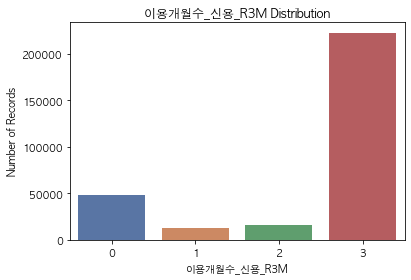

In [161]:
column_name = '이용개월수_신용_R3M'
user_friendly_name = '이용개월수_신용_R3M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용개월수_신판_R3M column

DataType:  int64

There are no null values

Number of Unique Values:  4

Distribution of column:

3    221276
0     49013
2     16504
1     13207
Name: 이용개월수_신판_R3M, dtype: int64

-----------------------------------------------------

이용개월수_신판_R3M Distribution


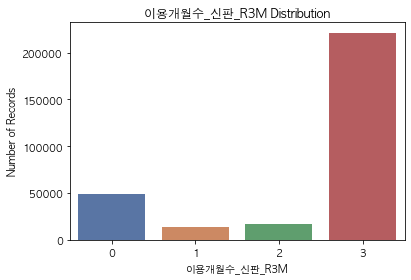

In [162]:
column_name = '이용개월수_신판_R3M'
user_friendly_name = '이용개월수_신판_R3M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용개월수_일시불_R3M column

DataType:  int64

There are no null values

Number of Unique Values:  4

Distribution of column:

3    218927
0     50465
2     16961
1     13647
Name: 이용개월수_일시불_R3M, dtype: int64

-----------------------------------------------------

이용개월수_일시불_R3M Distribution


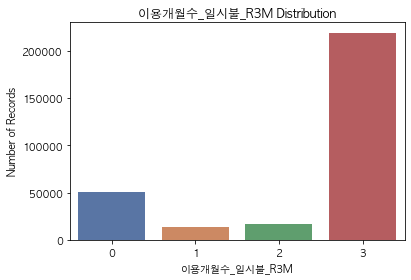

In [163]:
column_name = '이용개월수_일시불_R3M'
user_friendly_name = '이용개월수_일시불_R3M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용개월수_할부_R3M column

DataType:  int64

There are no null values

Number of Unique Values:  4

Distribution of column:

0    217618
1     40006
2     23559
3     18817
Name: 이용개월수_할부_R3M, dtype: int64

-----------------------------------------------------

이용개월수_할부_R3M Distribution


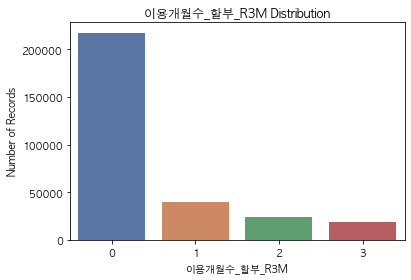

In [164]:
column_name = '이용개월수_할부_R3M'
user_friendly_name = '이용개월수_할부_R3M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용개월수_할부_유이자_R3M column

DataType:  int64

There are no null values

Number of Unique Values:  4

Distribution of column:

0    262968
1     24324
2      8569
3      4139
Name: 이용개월수_할부_유이자_R3M, dtype: int64

-----------------------------------------------------

이용개월수_할부_유이자_R3M Distribution


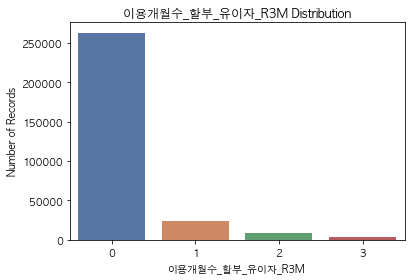

In [165]:
column_name = '이용개월수_할부_유이자_R3M'
user_friendly_name = '이용개월수_할부_유이자_R3M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용개월수_할부_무이자_R3M column

DataType:  int64

There are no null values

Number of Unique Values:  4

Distribution of column:

0    233803
1     35524
2     18235
3     12438
Name: 이용개월수_할부_무이자_R3M, dtype: int64

-----------------------------------------------------

이용개월수_할부_무이자_R3M Distribution


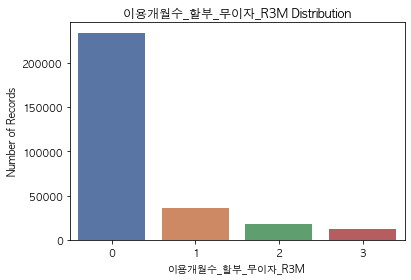

In [166]:
column_name = '이용개월수_할부_무이자_R3M'
user_friendly_name = '이용개월수_할부_무이자_R3M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용개월수_부분무이자_R3M column

DataType:  int64

There are no null values

Number of Unique Values:  4

Distribution of column:

0    298389
1      1423
2       153
3        35
Name: 이용개월수_부분무이자_R3M, dtype: int64

-----------------------------------------------------

이용개월수_부분무이자_R3M Distribution


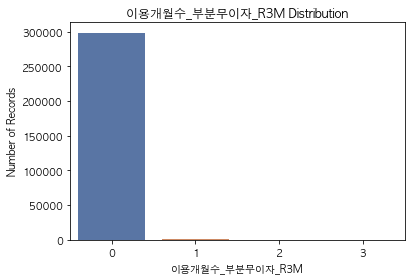

In [167]:
column_name = '이용개월수_부분무이자_R3M'
user_friendly_name = '이용개월수_부분무이자_R3M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용개월수_CA_R3M column

DataType:  int64

There are no null values

Number of Unique Values:  4

Distribution of column:

0    275956
1      9742
3      7613
2      6689
Name: 이용개월수_CA_R3M, dtype: int64

-----------------------------------------------------

이용개월수_CA_R3M Distribution


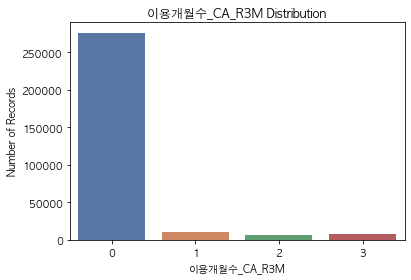

In [168]:
column_name = '이용개월수_CA_R3M'
user_friendly_name = '이용개월수_CA_R3M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용개월수_체크_R3M column

DataType:  int64

There are no null values

Number of Unique Values:  4

Distribution of column:

0    250082
3     31540
1     10175
2      8203
Name: 이용개월수_체크_R3M, dtype: int64

-----------------------------------------------------

이용개월수_체크_R3M Distribution


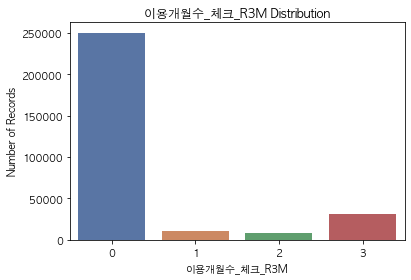

In [169]:
column_name = '이용개월수_체크_R3M'
user_friendly_name = '이용개월수_체크_R3M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용개월수_카드론_R3M column

DataType:  int64

There are no null values

Number of Unique Values:  4

Distribution of column:

0    293763
1      5624
2       540
3        73
Name: 이용개월수_카드론_R3M, dtype: int64

-----------------------------------------------------

이용개월수_카드론_R3M Distribution


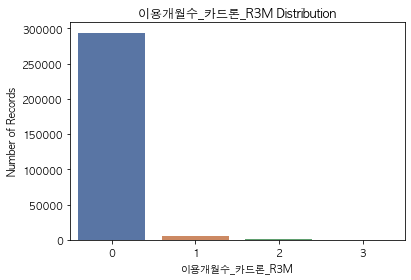

In [170]:
column_name = '이용개월수_카드론_R3M'
user_friendly_name = '이용개월수_카드론_R3M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [171]:
column_name = '이용가맹점수'
user_friendly_name = '이용가맹점수'

#Get Details
get_column_details(df,column_name)

Details of 이용가맹점수 column

DataType:  int64

There are no null values

Number of Unique Values:  262

Distribution of column:

0      50569
1      26222
2      20520
3      10474
4       8426
       ...  
257        1
302        1
198        1
222        1
254        1
Name: 이용가맹점수, Length: 262, dtype: int64


In [172]:
column_name = '이용금액_업종기준'
user_friendly_name = '이용금액_업종기준'

#Get Details
get_column_details(df,column_name)

Details of 이용금액_업종기준 column

DataType:  int64

There are no null values

Number of Unique Values:  188224

Distribution of column:

0          50569
900         9990
2700        2309
600         1124
1500         938
           ...  
5555440        1
2411761        1
4519158        1
824570         1
4519393        1
Name: 이용금액_업종기준, Length: 188224, dtype: int64


In [173]:
column_name = '이용금액_쇼핑'
user_friendly_name = '이용금액_쇼핑'

#Get Details
get_column_details(df,column_name)

Details of 이용금액_쇼핑 column

DataType:  int64

There are no null values

Number of Unique Values:  132678

Distribution of column:

0          102422
10000         221
4500          220
9000          214
30000         155
            ...  
664100          1
778780          1
737800          1
197120          1
1052670         1
Name: 이용금액_쇼핑, Length: 132678, dtype: int64


In [174]:
column_name = '이용금액_요식'
user_friendly_name = '이용금액_요식'

#Get Details
get_column_details(df,column_name)

Details of 이용금액_요식 column

DataType:  int64

There are no null values

Number of Unique Values:  13201

Distribution of column:

0         182697
10000        664
6000         662
5000         657
4000         612
           ...  
100790         1
316600         1
43410          1
313630         1
20470          1
Name: 이용금액_요식, Length: 13201, dtype: int64


In [175]:
column_name = '이용금액_교통'
user_friendly_name = '이용금액_교통'

#Get Details
get_column_details(df,column_name)

Details of 이용금액_교통 column

DataType:  int64

There are no null values

Number of Unique Values:  62043

Distribution of column:

0          131444
50000        2032
30000        1128
1250          933
100000        764
            ...  
679720          1
1220400         1
167730          1
1146700         1
536570          1
Name: 이용금액_교통, Length: 62043, dtype: int64


In [176]:
column_name = '이용금액_의료'
user_friendly_name = '이용금액_의료'

#Get Details
get_column_details(df,column_name)

Details of 이용금액_의료 column

DataType:  int64

There are no null values

Number of Unique Values:  34676

Distribution of column:

0          170885
6000          802
3000          801
10000         742
5000          724
            ...  
234480          1
893080          1
1009857         1
152520          1
1609710         1
Name: 이용금액_의료, Length: 34676, dtype: int64


In [177]:
column_name = '이용금액_납부'
user_friendly_name = '이용금액_납부'

#Get Details
get_column_details(df,column_name)

Details of 이용금액_납부 column

DataType:  int64

There are no null values

Number of Unique Values:  74307

Distribution of column:

0          134155
900         14298
2700         6164
300          2279
600          1992
            ...  
1868790         1
840700          1
726020          1
238610          1
530429          1
Name: 이용금액_납부, Length: 74307, dtype: int64


In [178]:
column_name = '이용금액_교육'
user_friendly_name = '이용금액_교육'

#Get Details
get_column_details(df,column_name)

Details of 이용금액_교육 column

DataType:  int64

There are no null values

Number of Unique Values:  14742

Distribution of column:

0          244946
10000         420
4000          372
15000         366
6000          342
            ...  
368350          1
278250          1
1675100         1
552800          1
81880           1
Name: 이용금액_교육, Length: 14742, dtype: int64


In [179]:
column_name = '이용금액_여유생활'
user_friendly_name = '이용금액_여유생활'

#Get Details
get_column_details(df,column_name)

Details of 이용금액_여유생활 column

DataType:  int64

There are no null values

Number of Unique Values:  18173

Distribution of column:

0          204093
10000        1383
20000        1353
30000        1065
12000         945
            ...  
2666850         1
29050           1
6185400         1
5464600         1
20470           1
Name: 이용금액_여유생활, Length: 18173, dtype: int64


In [180]:
column_name = '이용금액_사교활동'
user_friendly_name = '이용금액_사교활동'

#Get Details
get_column_details(df,column_name)

Details of 이용금액_사교활동 column

DataType:  int64

There are no null values

Number of Unique Values:  34457

Distribution of column:

0          133236
16000         626
18000         595
20000         531
14000         521
            ...  
1105010         1
97350           1
142380          1
150560          1
536570          1
Name: 이용금액_사교활동, Length: 34457, dtype: int64


In [181]:
column_name = '이용금액_일상생활'
user_friendly_name = '이용금액_일상생활'

#Get Details
get_column_details(df,column_name)

Details of 이용금액_일상생활 column

DataType:  int64

There are no null values

Number of Unique Values:  6904

Distribution of column:

0          228006
12000        2199
10000        2019
15000        1962
20000        1791
            ...  
1117000         1
60020           1
10860           1
105050          1
20470           1
Name: 이용금액_일상생활, Length: 6904, dtype: int64


In [182]:
column_name = '이용금액_해외'
user_friendly_name = '이용금액_해외'

#Get Details
get_column_details(df,column_name)

Details of 이용금액_해외 column

DataType:  int64

There are no null values

Number of Unique Values:  29414

Distribution of column:

0          268576
2556           31
1221           27
3383           26
3379           25
            ...  
312783          1
4117901         1
73076           1
1680739         1
2047            1
Name: 이용금액_해외, Length: 29414, dtype: int64


In [183]:
column_name = '쇼핑_도소매_이용금액'
user_friendly_name = '쇼핑_도소매_이용금액'

#Get Details
get_column_details(df,column_name)

Details of 쇼핑_도소매_이용금액 column

DataType:  int64

There are no null values

Number of Unique Values:  34081

Distribution of column:

0          166489
10000        1071
20000         908
30000         806
15000         665
            ...  
207875          1
840700          1
300020          1
1840100         1
1093610         1
Name: 쇼핑_도소매_이용금액, Length: 34081, dtype: int64


In [184]:
column_name = '쇼핑_백화점_이용금액'
user_friendly_name = '쇼핑_백화점_이용금액'

#Get Details
get_column_details(df,column_name)

Details of 쇼핑_백화점_이용금액 column

DataType:  int64

There are no null values

Number of Unique Values:  14674

Distribution of column:

0          247190
10000         663
20000         382
15000         259
12000         247
            ...  
89420           1
1658190         1
4304210         1
630100          1
61410           1
Name: 쇼핑_백화점_이용금액, Length: 14674, dtype: int64


In [185]:
column_name = '쇼핑_마트_이용금액'
user_friendly_name = '쇼핑_마트_이용금액'

#Get Details
get_column_details(df,column_name)

Details of 쇼핑_마트_이용금액 column

DataType:  int64

There are no null values

Number of Unique Values:  41046

Distribution of column:

0         203069
10000        298
9900         217
5000         193
3000         175
           ...  
698060         1
186050         1
627980         1
50470          1
536570         1
Name: 쇼핑_마트_이용금액, Length: 41046, dtype: int64


In [186]:
column_name = '쇼핑_슈퍼마켓_이용금액'
user_friendly_name = '쇼핑_슈퍼마켓_이용금액'

#Get Details
get_column_details(df,column_name)

Details of 쇼핑_슈퍼마켓_이용금액 column

DataType:  int64

There are no null values

Number of Unique Values:  39245

Distribution of column:

0          167381
4500          612
9000          553
5000          253
3000          249
            ...  
884990          1
1638280         1
1003390         1
810780          1
272430          1
Name: 쇼핑_슈퍼마켓_이용금액, Length: 39245, dtype: int64


In [187]:
column_name = '쇼핑_편의점_이용금액'
user_friendly_name = '쇼핑_편의점_이용금액'

#Get Details
get_column_details(df,column_name)

Details of 쇼핑_편의점_이용금액 column

DataType:  int64

There are no null values

Number of Unique Values:  26240

Distribution of column:

0         179634
4500        1034
9000         996
3000         680
10000        604
           ...  
450470         1
409530         1
327650         1
188450         1
179240         1
Name: 쇼핑_편의점_이용금액, Length: 26240, dtype: int64


In [188]:
column_name = '쇼핑_아울렛_이용금액'
user_friendly_name = '쇼핑_아울렛_이용금액'

#Get Details
get_column_details(df,column_name)

Details of 쇼핑_아울렛_이용금액 column

DataType:  int64

There are no null values

Number of Unique Values:  12261

Distribution of column:

0         261908
5000         608
3000         514
10000        501
6000         459
           ...  
145700         1
211460         1
31340          1
350920         1
61410          1
Name: 쇼핑_아울렛_이용금액, Length: 12261, dtype: int64


In [189]:
column_name = '쇼핑_온라인_이용금액'
user_friendly_name = '쇼핑_온라인_이용금액'

#Get Details
get_column_details(df,column_name)

Details of 쇼핑_온라인_이용금액 column

DataType:  int64

There are no null values

Number of Unique Values:  77515

Distribution of column:

0          173149
1000          630
2000          415
10000         380
59700         338
            ...  
317639          1
1347790         1
1855702         1
1419497         1
550899          1
Name: 쇼핑_온라인_이용금액, Length: 77515, dtype: int64


In [190]:
column_name = '쇼핑_기타_이용금액'
user_friendly_name = '쇼핑_기타_이용금액'

#Get Details
get_column_details(df,column_name)

Details of 쇼핑_기타_이용금액 column

DataType:  int64

There are no null values

Number of Unique Values:  18978

Distribution of column:

0         214741
5000        1532
3000        1441
2000        1299
4000        1279
           ...  
75320          1
632360         1
570890         1
846340         1
20470          1
Name: 쇼핑_기타_이용금액, Length: 18978, dtype: int64


In [191]:
column_name = '쇼핑_전체_이용금액'
user_friendly_name = '쇼핑_전체_이용금액'

#Get Details
get_column_details(df,column_name)

Details of 쇼핑_전체_이용금액 column

DataType:  int64

There are no null values

Number of Unique Values:  132678

Distribution of column:

0          102422
10000         221
4500          220
9000          214
30000         155
            ...  
664100          1
778780          1
737800          1
197120          1
1052670         1
Name: 쇼핑_전체_이용금액, Length: 132678, dtype: int64


In [192]:
column_name = '교통_주유이용금액'
user_friendly_name = '교통_주유이용금액'

#Get Details
get_column_details(df,column_name)

Details of 교통_주유이용금액 column

DataType:  int64

There are no null values

Number of Unique Values:  25981

Distribution of column:

0         208600
50000       5828
30000       3429
100000      2404
60000       1931
           ...  
154131         1
705453         1
164360         1
719367         1
53222          1
Name: 교통_주유이용금액, Length: 25981, dtype: int64


In [193]:
column_name = '교통_정비이용금액'
user_friendly_name = '교통_정비이용금액'

#Get Details
get_column_details(df,column_name)

Details of 교통_정비이용금액 column

DataType:  int64

There are no null values

Number of Unique Values:  16761

Distribution of column:

0         226913
1000        1295
2000        1218
3000         876
5000         648
           ...  
165080         1
214240         1
405490         1
62870          1
848150         1
Name: 교통_정비이용금액, Length: 16761, dtype: int64


In [194]:
column_name = '교통_통행료이용금액'
user_friendly_name = '교통_통행료이용금액'

#Get Details
get_column_details(df,column_name)

Details of 교통_통행료이용금액 column

DataType:  int64

There are no null values

Number of Unique Values:  503

Distribution of column:

0         295601
1000         317
6600         229
13200        180
54000        175
           ...  
235800         1
43900          1
84800          1
67400          1
98000          1
Name: 교통_통행료이용금액, Length: 503, dtype: int64


In [195]:
column_name = '교통_버스지하철이용금액'
user_friendly_name = '교통_버스지하철이용금액'

#Get Details
get_column_details(df,column_name)

Details of 교통_버스지하철이용금액 column

DataType:  int64

There are no null values

Number of Unique Values:  11701

Distribution of column:

0         216236
1250        3421
2500        2382
1200        1385
3750         983
           ...  
25860          1
39530          1
76380          1
203290         1
40940          1
Name: 교통_버스지하철이용금액, Length: 11701, dtype: int64


In [196]:
column_name = '교통_택시이용금액'
user_friendly_name = '교통_택시이용금액'

#Get Details
get_column_details(df,column_name)

Details of 교통_택시이용금액 column

DataType:  int64

There are no null values

Number of Unique Values:  11693

Distribution of column:

0         229024
3000        1228
3300         465
3600         450
6000         442
           ...  
98840          1
996200         1
316180         1
152260         1
182520         1
Name: 교통_택시이용금액, Length: 11693, dtype: int64


In [197]:
column_name = '교통_철도버스이용금액'
user_friendly_name = '교통_철도버스이용금액'

#Get Details
get_column_details(df,column_name)

Details of 교통_철도버스이용금액 column

DataType:  int64

There are no null values

Number of Unique Values:  5424

Distribution of column:

0         258529
14000        606
28000        433
10000        329
20000        249
           ...  
336700         1
443200         1
648100         1
354100         1
245000         1
Name: 교통_철도버스이용금액, Length: 5424, dtype: int64


In [198]:
column_name = '교통_전체이용금액'
user_friendly_name = '교통_전체이용금액'

#Get Details
get_column_details(df,column_name)

Details of 교통_전체이용금액 column

DataType:  int64

There are no null values

Number of Unique Values:  62043

Distribution of column:

0          131444
50000        2032
30000        1128
1250          933
100000        764
            ...  
679720          1
1220400         1
167730          1
1146700         1
536570          1
Name: 교통_전체이용금액, Length: 62043, dtype: int64


In [199]:
column_name = '여유_운동이용금액'
user_friendly_name = '여유_운동이용금액'

#Get Details
get_column_details(df,column_name)

Details of 여유_운동이용금액 column

DataType:  int64

There are no null values

Number of Unique Values:  8195

Distribution of column:

0          256167
10000         615
20000         550
30000         541
15000         452
            ...  
1274350         1
213480          1
489200          1
672200          1
720800          1
Name: 여유_운동이용금액, Length: 8195, dtype: int64


In [200]:
column_name = '여유_Pet이용금액'
user_friendly_name = '여유_Pet이용금액'

#Get Details
get_column_details(df,column_name)

Details of 여유_Pet이용금액 column

DataType:  int64

There are no null values

Number of Unique Values:  3289

Distribution of column:

0          284472
30000         852
20000         567
50000         500
10000         397
            ...  
176700          1
13420           1
79436           1
3188350         1
204700          1
Name: 여유_Pet이용금액, Length: 3289, dtype: int64


In [201]:
column_name = '여유_공연이용금액'
user_friendly_name = '여유_공연이용금액'

#Get Details
get_column_details(df,column_name)

Details of 여유_공연이용금액 column

DataType:  int64

There are no null values

Number of Unique Values:  2157

Distribution of column:

0          269003
10000        1290
24000        1162
20000        1141
12000        1021
            ...  
39540           1
10850           1
702000          1
1324000         1
20470           1
Name: 여유_공연이용금액, Length: 2157, dtype: int64


In [202]:
column_name = '여유_공원이용금액'
user_friendly_name = '여유_공원이용금액'

#Get Details
get_column_details(df,column_name)

Details of 여유_공원이용금액 column

DataType:  int64

There are no null values

Number of Unique Values:  1617

Distribution of column:

0         289472
10000        323
6000         282
12000        268
4000         213
           ...  
110620         1
233700         1
69640          1
331400         1
128700         1
Name: 여유_공원이용금액, Length: 1617, dtype: int64


In [203]:
column_name = '여유_숙박이용금액'
user_friendly_name = '여유_숙박이용금액'

#Get Details
get_column_details(df,column_name)

Details of 여유_숙박이용금액 column

DataType:  int64

There are no null values

Number of Unique Values:  4601

Distribution of column:

0          285480
60000         239
30000         232
50000         224
20000         208
            ...  
76100           1
1248000         1
174900          1
427185          1
204700          1
Name: 여유_숙박이용금액, Length: 4601, dtype: int64


In [204]:
column_name = '여유_여행이용금액'
user_friendly_name = '여유_여행이용금액'

#Get Details
get_column_details(df,column_name)

Details of 여유_여행이용금액 column

DataType:  int64

There are no null values

Number of Unique Values:  1173

Distribution of column:

0          297231
10000         297
20000         265
30000         111
40000          86
            ...  
636000          1
1228800         1
1319900         1
1811500         1
98000           1
Name: 여유_여행이용금액, Length: 1173, dtype: int64


In [205]:
column_name = '여유_항공이용금액'
user_friendly_name = '여유_항공이용금액'

#Get Details
get_column_details(df,column_name)

Details of 여유_항공이용금액 column

DataType:  int64

There are no null values

Number of Unique Values:  6866

Distribution of column:

0          288181
21200          72
25600          43
42400          41
10600          38
            ...  
776200          1
534800          1
2168400         1
1878400         1
122820          1
Name: 여유_항공이용금액, Length: 6866, dtype: int64


In [206]:
column_name = '여유_기타이용금액'
user_friendly_name = '여유_기타이용금액'

#Get Details
get_column_details(df,column_name)

Details of 여유_기타이용금액 column

DataType:  int64

There are no null values

Number of Unique Values:  3400

Distribution of column:

0          272187
20000         929
15000         851
10000         813
3000          539
            ...  
1340700         1
136400          1
159500          1
461000          1
133590          1
Name: 여유_기타이용금액, Length: 3400, dtype: int64


In [207]:
column_name = '여유_전체이용금액'
user_friendly_name = '여유_전체이용금액'

#Get Details
get_column_details(df,column_name)

Details of 여유_전체이용금액 column

DataType:  int64

There are no null values

Number of Unique Values:  18173

Distribution of column:

0          204093
10000        1383
20000        1353
30000        1065
12000         945
            ...  
2666850         1
29050           1
6185400         1
5464600         1
20470           1
Name: 여유_전체이용금액, Length: 18173, dtype: int64


In [208]:
column_name = '납부_통신비이용금액'
user_friendly_name = '납부_통신비이용금액'

#Get Details
get_column_details(df,column_name)

Details of 납부_통신비이용금액 column

DataType:  int64

There are no null values

Number of Unique Values:  48178

Distribution of column:

0         203393
49500        392
98670        286
33000        247
66000        210
           ...  
189490         1
140330         1
676900         1
230430         1
20470          1
Name: 납부_통신비이용금액, Length: 48178, dtype: int64


In [209]:
column_name = '납부_관리비이용금액'
user_friendly_name = '납부_관리비이용금액'

#Get Details
get_column_details(df,column_name)

Details of 납부_관리비이용금액 column

DataType:  int64

There are no null values

Number of Unique Values:  8756

Distribution of column:

0         290689
327070         3
481260         3
485140         3
463380         3
           ...  
359160         1
481980         1
424600         1
445070         1
577510         1
Name: 납부_관리비이용금액, Length: 8756, dtype: int64


In [210]:
column_name = '납부_렌탈료이용금액'
user_friendly_name = '납부_렌탈료이용금액'

#Get Details
get_column_details(df,column_name)

Details of 납부_렌탈료이용금액 column

DataType:  int64

There are no null values

Number of Unique Values:  1

Distribution of column:

0    300000
Name: 납부_렌탈료이용금액, dtype: int64


In [211]:
column_name = '납부_가스전기료이용금액'
user_friendly_name = '납부_가스전기료이용금액'

#Get Details
get_column_details(df,column_name)

Details of 납부_가스전기료이용금액 column

DataType:  int64

There are no null values

Number of Unique Values:  7558

Distribution of column:

0         290577
3320          15
5510          13
4780          13
1870          11
           ...  
433570         1
23930          1
77140          1
31870          1
91820          1
Name: 납부_가스전기료이용금액, Length: 7558, dtype: int64


In [212]:
column_name = '납부_보험료이용금액'
user_friendly_name = '납부_보험료이용금액'

#Get Details
get_column_details(df,column_name)

Details of 납부_보험료이용금액 column

DataType:  int64

There are no null values

Number of Unique Values:  26707

Distribution of column:

0          264157
30000         171
300000        101
60000          95
600000         81
            ...  
899818          1
821964          1
461500          1
1553067         1
530429          1
Name: 납부_보험료이용금액, Length: 26707, dtype: int64


In [213]:
column_name = '납부_유선방송이용금액'
user_friendly_name = '납부_유선방송이용금액'

#Get Details
get_column_details(df,column_name)

Details of 납부_유선방송이용금액 column

DataType:  int64

There are no null values

Number of Unique Values:  310

Distribution of column:

0         299529
9900          14
23100         13
22869         13
16335          8
           ...  
82500          1
97827          1
46200          1
51989          1
120260         1
Name: 납부_유선방송이용금액, Length: 310, dtype: int64


In [214]:
column_name = '납부_건강연금이용금액'
user_friendly_name = '납부_건강연금이용금액'

#Get Details
get_column_details(df,column_name)

Details of 납부_건강연금이용금액 column

DataType:  int64

There are no null values

Number of Unique Values:  718

Distribution of column:

0          299211
269436         13
42516          11
272160         11
41910           5
            ...  
1114996         1
2962930         1
691204          1
209200          1
7200580         1
Name: 납부_건강연금이용금액, Length: 718, dtype: int64


In [215]:
column_name = '납부_기타이용금액'
user_friendly_name = '납부_기타이용금액'

#Get Details
get_column_details(df,column_name)

Details of 납부_기타이용금액 column

DataType:  int64

There are no null values

Number of Unique Values:  15523

Distribution of column:

0         213010
900        15020
2700        9390
300         2570
600         2261
           ...  
3425           1
34160          1
574840         1
54650          1
12282          1
Name: 납부_기타이용금액, Length: 15523, dtype: int64


In [216]:
column_name = '납부_전체이용금액'
user_friendly_name = '납부_전체이용금액'

#Get Details
get_column_details(df,column_name)

Details of 납부_전체이용금액 column

DataType:  int64

There are no null values

Number of Unique Values:  74307

Distribution of column:

0          134155
900         14298
2700         6164
300          2279
600          1992
            ...  
1868790         1
840700          1
726020          1
238610          1
530429          1
Name: 납부_전체이용금액, Length: 74307, dtype: int64


In [217]:
column_name = '할부건수_3M_R12M'
user_friendly_name = '할부건수_3M_R12M'

#Get Details
get_column_details(df,column_name)

Details of 할부건수_3M_R12M column

DataType:  int64

There are no null values

Number of Unique Values:  176

Distribution of column:

0      183165
1       30445
2       17241
3       11424
4        8544
        ...  
143         1
146         1
148         1
150         1
247         1
Name: 할부건수_3M_R12M, Length: 176, dtype: int64


In [218]:
column_name = '할부건수_6M_R12M'
user_friendly_name = '할부건수_6M_R12M'

#Get Details
get_column_details(df,column_name)

Details of 할부건수_6M_R12M column

DataType:  int64

There are no null values

Number of Unique Values:  139

Distribution of column:

0      215284
1       32535
2       15473
3        8882
4        5902
        ...  
116         1
118         1
120         1
121         1
227         1
Name: 할부건수_6M_R12M, Length: 139, dtype: int64


In [219]:
column_name = '할부건수_12M_R12M'
user_friendly_name = '할부건수_12M_R12M'

#Get Details
get_column_details(df,column_name)

Details of 할부건수_12M_R12M column

DataType:  int64

There are no null values

Number of Unique Values:  74

Distribution of column:

0      271672
1       16898
2        5109
3        2272
4        1163
        ...  
41          1
43          1
45          1
52          1
173         1
Name: 할부건수_12M_R12M, Length: 74, dtype: int64


In [220]:
column_name = 'RP건수_B0M'
user_friendly_name = 'RP건수_B0M'

#Get Details
get_column_details(df,column_name)

Details of RP건수_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  31

Distribution of column:

0      146236
1       76895
2       31222
3       20088
4       11823
5        6428
6        3358
7        1784
8         896
9         551
10        305
11        161
12         81
13         58
14         44
16         19
15         15
18          8
22          5
17          4
20          4
21          4
24          3
19          1
27          1
28          1
29          1
32          1
44          1
106         1
154         1
Name: RP건수_B0M, dtype: int64


In [221]:
column_name = 'RP금액_B0M'
user_friendly_name = 'RP금액_B0M'

#Get Details
get_column_details(df,column_name)

Details of RP금액_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  32155

Distribution of column:

0          146236
300         19508
900          6981
1250         1385
3300         1294
            ...  
241920          1
364740          1
467090          1
2183260         1
20470           1
Name: RP금액_B0M, Length: 32155, dtype: int64


In [222]:
column_name = '증감_RP건수_전월'
user_friendly_name = '증감_RP건수_전월'

#Get Details
get_column_details(df,column_name)

Details of 증감_RP건수_전월 column

DataType:  int64

There are no null values

Number of Unique Values:  36

Distribution of column:

 0      236274
-1       22328
 1       21349
 2        7169
-2        6707
 3        2133
-3        2025
 4         683
-4         611
 5         210
-5         186
-6          97
 6          84
 7          26
-7          24
-8          20
-9          15
 8          10
-11          8
 9           7
-10          7
 10          4
 11          3
-13          3
-12          3
 13          2
 12          2
-16          2
-147         1
-18          1
-78          1
 28          1
 26          1
 22          1
 15          1
 50          1
Name: 증감_RP건수_전월, dtype: int64


Details of 증감_RP유형건수_전월 column

DataType:  int64

There are no null values

Number of Unique Values:  9

Distribution of column:

 0    250910
-1     20938
 1     19168
 2      4534
-2      4146
-3       144
 3       140
 4        10
-4        10
Name: 증감_RP유형건수_전월, dtype: int64

-----------------------------------------------------

증감_RP유형건수_전월 Distribution


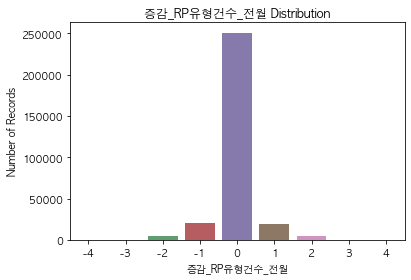

In [223]:
column_name = '증감_RP유형건수_전월'
user_friendly_name = '증감_RP유형건수_전월'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용개월수_온라인_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  7

Distribution of column:

0    146862
6     58767
1     30024
2     18483
5     16967
3     14634
4     14263
Name: 이용개월수_온라인_R6M, dtype: int64

-----------------------------------------------------

이용개월수_온라인_R6M Distribution


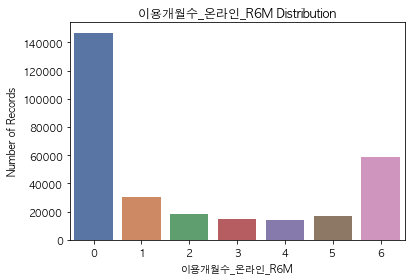

In [224]:
column_name = '이용개월수_온라인_R6M'
user_friendly_name = '이용개월수_온라인_R6M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용개월수_오프라인_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  7

Distribution of column:

6    202975
0     41894
5     15678
4     11601
1     10030
2      9165
3      8657
Name: 이용개월수_오프라인_R6M, dtype: int64

-----------------------------------------------------

이용개월수_오프라인_R6M Distribution


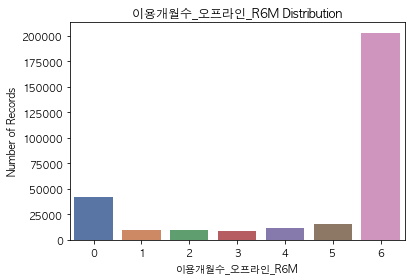

In [225]:
column_name = '이용개월수_오프라인_R6M'
user_friendly_name = '이용개월수_오프라인_R6M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [226]:
column_name = '이용건수_오프라인_R6M'
user_friendly_name = '이용건수_오프라인_R6M'

#Get Details
get_column_details(df,column_name)

Details of 이용건수_오프라인_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  981

Distribution of column:

0       41894
6       18249
1        6089
2        4637
7        4610
        ...  
1033        1
852         1
1034        1
1106        1
1023        1
Name: 이용건수_오프라인_R6M, Length: 981, dtype: int64


In [227]:
column_name = '이용건수_온라인_B0M'
user_friendly_name = '이용건수_온라인_B0M'

#Get Details
get_column_details(df,column_name)

Details of 이용건수_온라인_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  103

Distribution of column:

0      197772
1       31637
2       15508
3       10378
4        7678
        ...  
77          1
583         1
71          1
67          1
198         1
Name: 이용건수_온라인_B0M, Length: 103, dtype: int64


In [228]:
column_name = '이용건수_오프라인_B0M'
user_friendly_name = '이용건수_오프라인_B0M'

#Get Details
get_column_details(df,column_name)

Details of 이용건수_오프라인_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  214

Distribution of column:

0      68872
1      42157
2      17545
3      12030
4       9674
       ...  
292        1
173        1
186        1
185        1
253        1
Name: 이용건수_오프라인_B0M, Length: 214, dtype: int64


Details of 이용개월수_페이_온라인_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  7

Distribution of column:

0    188324
6     41216
1     20919
5     14197
2     13028
4     11231
3     11085
Name: 이용개월수_페이_온라인_R6M, dtype: int64

-----------------------------------------------------

이용개월수_페이_온라인_R6M Distribution


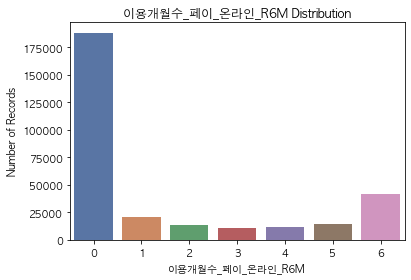

In [229]:
column_name = '이용개월수_페이_온라인_R6M'
user_friendly_name = '이용개월수_페이_온라인_R6M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용개월수_페이_오프라인_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  7

Distribution of column:

0    266326
6     11579
1      6555
2      4317
5      4082
3      3617
4      3524
Name: 이용개월수_페이_오프라인_R6M, dtype: int64

-----------------------------------------------------

이용개월수_페이_오프라인_R6M Distribution


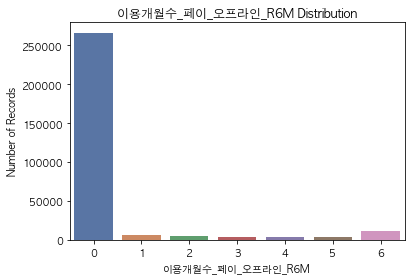

In [230]:
column_name = '이용개월수_페이_오프라인_R6M'
user_friendly_name = '이용개월수_페이_오프라인_R6M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [231]:
column_name = '이용금액_페이_온라인_R6M'
user_friendly_name = '이용금액_페이_온라인_R6M'

#Get Details
get_column_details(df,column_name)

Details of 이용금액_페이_온라인_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  88709

Distribution of column:

0          188324
30000         213
10000         139
20000         126
50000         117
            ...  
477616          1
498090          1
2317867         1
1454495         1
1583099         1
Name: 이용금액_페이_온라인_R6M, Length: 88709, dtype: int64


In [232]:
column_name = '이용건수_페이_온라인_R6M'
user_friendly_name = '이용건수_페이_온라인_R6M'

#Get Details
get_column_details(df,column_name)

Details of 이용건수_페이_온라인_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  50

Distribution of column:

0     188324
1      18827
2      11118
6       8899
3       8572
4       7511
5       7282
7       6704
8       5728
9       5041
10      4511
11      3983
12      3797
13      3054
14      2650
15      2151
16      1882
17      1602
18      1503
19      1238
20       940
21       865
22       667
23       598
24       507
25       351
26       328
27       249
28       238
29       163
30       148
31       123
32        98
33        78
34        58
35        51
36        35
37        31
38        22
40        13
39        12
41        11
42        10
44         7
45         5
48         5
43         4
47         3
49         2
51         1
Name: 이용건수_페이_온라인_R6M, dtype: int64


In [233]:
column_name = '이용건수_페이_오프라인_R6M'
user_friendly_name = '이용건수_페이_오프라인_R6M'

#Get Details
get_column_details(df,column_name)

Details of 이용건수_페이_오프라인_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  24

Distribution of column:

0     266326
6       8331
1       6364
2       4199
5       3624
3       3453
4       3298
7       2060
8        995
9        535
10       311
11       219
12       167
13        39
14        24
15        17
16        15
17         7
18         7
20         3
21         3
22         1
24         1
25         1
Name: 이용건수_페이_오프라인_R6M, dtype: int64


In [234]:
column_name = '이용건수_페이_오프라인_R3M'
user_friendly_name = '이용건수_페이_오프라인_R3M'

#Get Details
get_column_details(df,column_name)

Details of 이용건수_페이_오프라인_R3M column

DataType:  int64

There are no null values

Number of Unique Values:  15

Distribution of column:

0     271753
3      12779
1       6562
2       5467
4       2022
5        824
6        462
7         74
8         26
9         20
11         5
10         2
12         2
13         1
14         1
Name: 이용건수_페이_오프라인_R3M, dtype: int64


In [235]:
column_name = '이용건수_페이_온라인_B0M'
user_friendly_name = '이용건수_페이_온라인_B0M'

#Get Details
get_column_details(df,column_name)

Details of 이용건수_페이_온라인_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  11

Distribution of column:

0     224577
1      37600
2      20884
3      10157
4       4262
5       1648
6        608
7        190
8         58
9         13
10         3
Name: 이용건수_페이_온라인_B0M, dtype: int64


In [236]:
column_name = '이용건수_페이_오프라인_B0M'
user_friendly_name = '이용건수_페이_오프라인_B0M'

#Get Details
get_column_details(df,column_name)

Details of 이용건수_페이_오프라인_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  6

Distribution of column:

0    278454
1     19550
2      1881
3       102
4         9
5         4
Name: 이용건수_페이_오프라인_B0M, dtype: int64


Details of 이용개월수_간편결제_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  7

Distribution of column:

0    182337
6     49013
1     19759
5     14299
2     12598
4     11074
3     10920
Name: 이용개월수_간편결제_R6M, dtype: int64

-----------------------------------------------------

이용개월수_간편결제_R6M Distribution


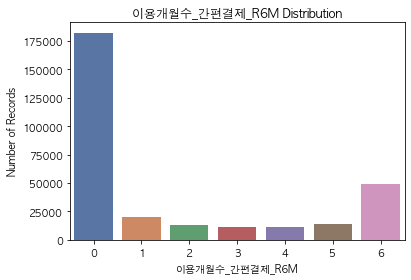

In [237]:
column_name = '이용개월수_간편결제_R6M'
user_friendly_name = '이용개월수_간편결제_R6M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)



Details of 이용개월수_전체_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  7

Distribution of column:

6    202337
0     41744
5     18587
1     10741
4      9896
3      8741
2      7954
Name: 이용개월수_전체_R6M, dtype: int64

-----------------------------------------------------

이용개월수_전체_R6M Distribution


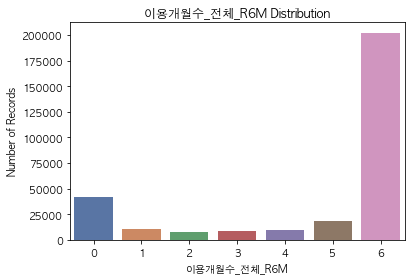

In [238]:
column_name = '이용개월수_전체_R6M'
user_friendly_name = '이용개월수_전체_R6M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용개월수_전체_R3M column

DataType:  int64

There are no null values

Number of Unique Values:  4

Distribution of column:

3    216064
0     53374
2     16123
1     14439
Name: 이용개월수_전체_R3M, dtype: int64

-----------------------------------------------------

이용개월수_전체_R3M Distribution


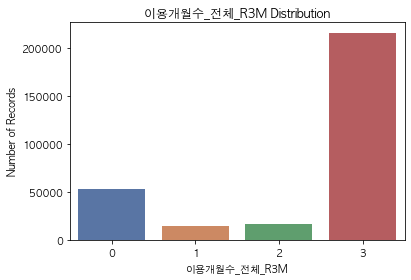

In [239]:
column_name = '이용개월수_전체_R3M'
user_friendly_name = '이용개월수_전체_R3M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 이용개월수_결제일_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  7

Distribution of column:

6    166832
0     49166
5     27550
4     16028
1     14404
3     13702
2     12318
Name: 이용개월수_결제일_R6M, dtype: int64

-----------------------------------------------------

이용개월수_결제일_R6M Distribution


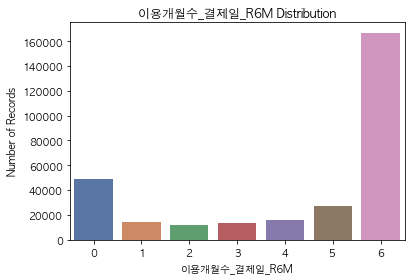

In [240]:
column_name = '이용개월수_결제일_R6M'
user_friendly_name = '이용개월수_결제일_R6M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [241]:
column_name = '이용금액대'
user_friendly_name = '이용금액대'

#Get Details
get_column_details(df,column_name)

Details of 이용금액대 column

DataType:  object

There are no null values

Number of Unique Values:  6

Distribution of column:

01.100만원+    61467
05.10만원-     59192
02.50만원+     54216
09.미사용       48480
03.30만원+     39667
04.10만원+     36978
Name: 이용금액대, dtype: int64


In [242]:
column_name = '청구금액_R3M'
user_friendly_name = '청구금액_R3M'

#Get Details
get_column_details(df,column_name)

Details of 청구금액_R3M column

DataType:  int64

There are no null values

Number of Unique Values:  215929

Distribution of column:

0           45205
300          1575
2700         1515
10000        1498
900          1216
            ...  
1607503         1
40920915        1
1597268         1
546645          1
692690          1
Name: 청구금액_R3M, Length: 215929, dtype: int64


In [243]:
column_name = '청구금액_R6M'
user_friendly_name = '청구금액_R6M'

#Get Details
get_column_details(df,column_name)

Details of 청구금액_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  235923

Distribution of column:

0          32174
10000       2431
5000        1550
5400        1024
8000         959
           ...  
3160400        1
1059154        1
530772         1
2625877        1
1576958        1
Name: 청구금액_R6M, Length: 235923, dtype: int64


In [244]:
column_name = '할인건수_R3M'
user_friendly_name = '할인건수_R3M'

#Get Details
get_column_details(df,column_name)

Details of 할인건수_R3M column

DataType:  int64

There are no null values

Number of Unique Values:  266

Distribution of column:

0      184716
3       34965
1       18166
2       15156
4        6911
        ...  
176         1
170         1
327         1
155         1
255         1
Name: 할인건수_R3M, Length: 266, dtype: int64


In [245]:
column_name = '할인금액_R3M'
user_friendly_name = '할인금액_R3M'

#Get Details
get_column_details(df,column_name)

Details of 할인금액_R3M column

DataType:  int64

There are no null values

Number of Unique Values:  31121

Distribution of column:

0         184779
900        13098
15000       5808
4000        3500
10000       2735
           ...  
28772          1
100443         1
75855          1
79949          1
8188           1
Name: 할인금액_R3M, Length: 31121, dtype: int64


In [246]:
column_name = '할인건수_B0M'
user_friendly_name = '할인건수_B0M'

#Get Details
get_column_details(df,column_name)

Details of 할인건수_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  118

Distribution of column:

0      206326
1       55427
2       12436
3        6749
4        4629
        ...  
79          1
81          1
91          1
82          1
175         1
Name: 할인건수_B0M, Length: 118, dtype: int64


In [247]:
column_name = '할인금액_B0M'
user_friendly_name = '할인금액_B0M'

#Get Details
get_column_details(df,column_name)

Details of 할인금액_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  16169

Distribution of column:

0        206385
300       17697
5000       7791
17000      5255
13000      4691
          ...  
19299         1
7017          1
2923          1
13164         1
2047          1
Name: 할인금액_B0M, Length: 16169, dtype: int64


Details of 상환개월수_R12M column

DataType:  int64

There are no null values

Number of Unique Values:  13

Distribution of column:

12    177378
11     19649
0      16481
10     12972
1      11564
9      10022
8       9304
5       7906
7       7889
6       7556
2       7051
4       6329
3       5899
Name: 상환개월수_R12M, dtype: int64

-----------------------------------------------------

상환개월수_R12M Distribution


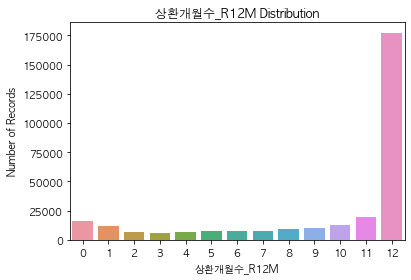

In [248]:
column_name = '상환개월수_R12M'
user_friendly_name = '상환개월수_R12M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 상환개월수_결제일_R12M column

DataType:  int64

There are no null values

Number of Unique Values:  13

Distribution of column:

12    100316
11     33010
0      25179
10     21923
9      16732
1      16624
8      14717
7      13275
6      12445
5      12196
2      11619
4      11220
3      10744
Name: 상환개월수_결제일_R12M, dtype: int64

-----------------------------------------------------

상환개월수_결제일_R12M Distribution


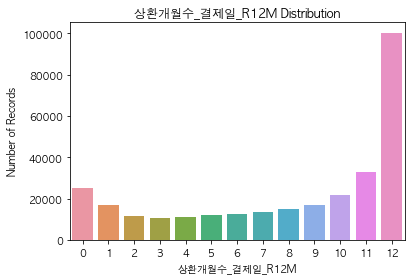

In [249]:
column_name = '상환개월수_결제일_R12M'
user_friendly_name = '상환개월수_결제일_R12M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 상환개월수_결제일_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  7

Distribution of column:

6    137621
0     43688
5     37564
4     24125
1     21350
3     18632
2     17020
Name: 상환개월수_결제일_R6M, dtype: int64

-----------------------------------------------------

상환개월수_결제일_R6M Distribution


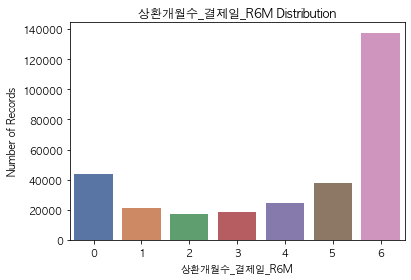

In [250]:
column_name = '상환개월수_결제일_R6M'
user_friendly_name = '상환개월수_결제일_R6M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 상환개월수_결제일_R3M column

DataType:  int64

There are no null values

Number of Unique Values:  4

Distribution of column:

3    165363
0     62946
2     40597
1     31094
Name: 상환개월수_결제일_R3M, dtype: int64

-----------------------------------------------------

상환개월수_결제일_R3M Distribution


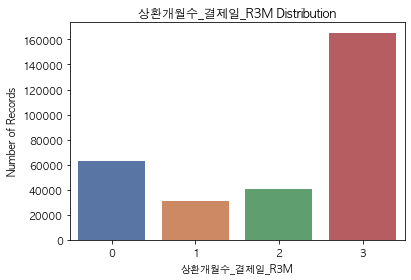

In [251]:
column_name = '상환개월수_결제일_R3M'
user_friendly_name = '상환개월수_결제일_R3M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [252]:
column_name = '연체건수_R12M'
user_friendly_name = '연체건수_R12M'

#Get Details
get_column_details(df,column_name)

Details of 연체건수_R12M column

DataType:  int64

There are no null values

Number of Unique Values:  52

Distribution of column:

0     211830
1      32776
2      16412
3       9800
4       6739
5       4871
6       3793
7       2863
8       2279
9       1868
10      1481
11      1312
12      1087
13       770
14       540
15       386
16       290
17       194
18       163
19       100
20        90
21        75
22        46
24        43
23        34
25        20
26        19
29        17
27        15
28        14
30        13
32        11
31         9
33         8
34         8
36         3
37         2
38         2
41         2
46         2
48         2
50         1
73         1
70         1
58         1
55         1
39         1
45         1
43         1
42         1
35         1
89         1
Name: 연체건수_R12M, dtype: int64


In [253]:
column_name = '연체건수_R6M'
user_friendly_name = '연체건수_R6M'

#Get Details
get_column_details(df,column_name)

Details of 연체건수_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  36

Distribution of column:

0     236673
1      28107
2      13045
3       7543
4       4903
5       3440
6       2550
7       1499
8        856
9        487
10       280
11       197
12       124
13        90
14        59
15        35
16        26
17        21
19        15
18        15
20         7
26         4
21         3
22         3
23         3
32         3
27         2
30         2
24         1
25         1
31         1
33         1
39         1
43         1
49         1
51         1
Name: 연체건수_R6M, dtype: int64


In [254]:
column_name = '연체건수_R3M'
user_friendly_name = '연체건수_R3M'

#Get Details
get_column_details(df,column_name)

Details of 연체건수_R3M column

DataType:  int64

There are no null values

Number of Unique Values:  28

Distribution of column:

0     256584
1      23831
2      10114
3       5562
4       2143
5        945
6        408
7        190
8         83
9         49
11        28
10        24
12         9
14         7
13         5
15         2
16         2
17         2
18         2
26         2
19         1
20         1
22         1
24         1
25         1
27         1
28         1
32         1
Name: 연체건수_R3M, dtype: int64


In [255]:
column_name = '혜택수혜금액'
user_friendly_name = '혜택수혜금액'

#Get Details
get_column_details(df,column_name)

Details of 혜택수혜금액 column

DataType:  int64

There are no null values

Number of Unique Values:  27930

Distribution of column:

0        162794
300       16970
5000       8983
17000      4970
13000      4436
          ...  
54150         1
33676         1
35725         1
25488         1
34159         1
Name: 혜택수혜금액, Length: 27930, dtype: int64


In [256]:
column_name = '컨택건수_카드론_TM_B0M'
user_friendly_name = '컨택건수_카드론_TM_B0M'

#Get Details
get_column_details(df,column_name)

Details of 컨택건수_카드론_TM_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  19

Distribution of column:

0     276418
1       6907
2       6165
3       4522
4       2915
5       1632
6        789
7        373
8        135
9         70
10        34
11        16
12         9
13         8
14         3
15         1
16         1
17         1
22         1
Name: 컨택건수_카드론_TM_B0M, dtype: int64


In [257]:
column_name = '컨택건수_리볼빙_TM_B0M'
user_friendly_name = '컨택건수_리볼빙_TM_B0M'

#Get Details
get_column_details(df,column_name)

Details of 컨택건수_리볼빙_TM_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  8

Distribution of column:

0    297052
2      1428
1      1297
3       159
4        46
5        13
7         3
6         2
Name: 컨택건수_리볼빙_TM_B0M, dtype: int64


In [258]:
column_name = '컨택건수_CA_TM_B0M'
user_friendly_name = '컨택건수_CA_TM_B0M'

#Get Details
get_column_details(df,column_name)

Details of 컨택건수_CA_TM_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  1

Distribution of column:

0    300000
Name: 컨택건수_CA_TM_B0M, dtype: int64


In [259]:
column_name = '컨택건수_이용유도_TM_B0M'
user_friendly_name = '컨택건수_이용유도_TM_B0M'

#Get Details
get_column_details(df,column_name)

Details of 컨택건수_이용유도_TM_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  9

Distribution of column:

0    268275
1     19871
2      8994
3      1677
4       878
5       191
6        87
7        25
8         2
Name: 컨택건수_이용유도_TM_B0M, dtype: int64


In [260]:
column_name = '컨택건수_신용발급_TM_B0M'
user_friendly_name = '컨택건수_신용발급_TM_B0M'

#Get Details
get_column_details(df,column_name)

Details of 컨택건수_신용발급_TM_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  8

Distribution of column:

0    298273
1      1670
2        37
3        10
4         6
5         2
7         1
9         1
Name: 컨택건수_신용발급_TM_B0M, dtype: int64


In [261]:
column_name = '컨택건수_부대서비스_TM_B0M'
user_friendly_name = '컨택건수_부대서비스_TM_B0M'

#Get Details
get_column_details(df,column_name)

Details of 컨택건수_부대서비스_TM_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  12

Distribution of column:

0     293138
1       5078
2       1152
3        421
4        126
5         58
6         13
7          6
8          3
9          3
10         1
11         1
Name: 컨택건수_부대서비스_TM_B0M, dtype: int64


In [262]:
column_name = '컨택건수_포인트소진_TM_B0M'
user_friendly_name = '컨택건수_포인트소진_TM_B0M'

#Get Details
get_column_details(df,column_name)

Details of 컨택건수_포인트소진_TM_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  13

Distribution of column:

0     296917
1       2130
2        624
3        212
4         66
5         17
6         15
7          7
8          6
10         3
9          1
11         1
13         1
Name: 컨택건수_포인트소진_TM_B0M, dtype: int64


In [263]:
column_name = '컨택건수_보험_TM_B0M'
user_friendly_name = '컨택건수_보험_TM_B0M'

#Get Details
get_column_details(df,column_name)

Details of 컨택건수_보험_TM_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  4

Distribution of column:

0    270302
1     29669
2        27
3         2
Name: 컨택건수_보험_TM_B0M, dtype: int64


In [264]:
column_name = '컨택건수_카드론_LMS_B0M'
user_friendly_name = '컨택건수_카드론_LMS_B0M'

#Get Details
get_column_details(df,column_name)

Details of 컨택건수_카드론_LMS_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  3

Distribution of column:

0    291179
1      8466
2       355
Name: 컨택건수_카드론_LMS_B0M, dtype: int64


In [265]:
column_name = '컨택건수_CA_LMS_B0M'
user_friendly_name = '컨택건수_CA_LMS_B0M'

#Get Details
get_column_details(df,column_name)

Details of 컨택건수_CA_LMS_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  4

Distribution of column:

0    294863
1      4973
2       163
3         1
Name: 컨택건수_CA_LMS_B0M, dtype: int64


In [266]:
column_name = '컨택건수_리볼빙_LMS_B0M'
user_friendly_name = '컨택건수_리볼빙_LMS_B0M'

#Get Details
get_column_details(df,column_name)

Details of 컨택건수_리볼빙_LMS_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  3

Distribution of column:

0    297004
1      2979
2        17
Name: 컨택건수_리볼빙_LMS_B0M, dtype: int64


In [267]:
column_name = '컨택건수_이용유도_LMS_B0M'
user_friendly_name = '컨택건수_이용유도_LMS_B0M'

#Get Details
get_column_details(df,column_name)

Details of 컨택건수_이용유도_LMS_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  12

Distribution of column:

0     201273
1      62076
2      20924
3       6842
4       5425
5       2426
6        714
7        208
8         77
9         24
10        10
11         1
Name: 컨택건수_이용유도_LMS_B0M, dtype: int64


In [268]:
column_name = '컨택건수_카드론_EM_B0M'
user_friendly_name = '컨택건수_카드론_EM_B0M'

#Get Details
get_column_details(df,column_name)

Details of 컨택건수_카드론_EM_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  2

Distribution of column:

0    296470
1      3530
Name: 컨택건수_카드론_EM_B0M, dtype: int64


In [269]:
column_name = '컨택건수_CA_EM_B0M'
user_friendly_name = '컨택건수_CA_EM_B0M'

#Get Details
get_column_details(df,column_name)

Details of 컨택건수_CA_EM_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  1

Distribution of column:

0    300000
Name: 컨택건수_CA_EM_B0M, dtype: int64


In [270]:
column_name = '컨택건수_리볼빙_EM_B0M'
user_friendly_name = '컨택건수_리볼빙_EM_B0M'

#Get Details
get_column_details(df,column_name)

Details of 컨택건수_리볼빙_EM_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  1

Distribution of column:

0    300000
Name: 컨택건수_리볼빙_EM_B0M, dtype: int64


In [271]:
column_name = '컨택건수_이용유도_EM_B0M'
user_friendly_name = '컨택건수_이용유도_EM_B0M'

#Get Details
get_column_details(df,column_name)

Details of 컨택건수_이용유도_EM_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  18

Distribution of column:

0     102781
2      77051
1      42054
3      16441
8       8355
7       7900
9       7834
4       7216
6       6977
10      6661
5       6173
11      4933
12      3068
13      1643
14       653
15       198
16        52
17        10
Name: 컨택건수_이용유도_EM_B0M, dtype: int64


In [272]:
column_name = '컨택건수_카드론_청구서_B0M'
user_friendly_name = '컨택건수_카드론_청구서_B0M'

#Get Details
get_column_details(df,column_name)

Details of 컨택건수_카드론_청구서_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  2

Distribution of column:

0    297053
1      2947
Name: 컨택건수_카드론_청구서_B0M, dtype: int64


In [273]:
column_name = '컨택건수_CA_청구서_B0M'
user_friendly_name = '컨택건수_CA_청구서_B0M'

#Get Details
get_column_details(df,column_name)

Details of 컨택건수_CA_청구서_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  3

Distribution of column:

0    285546
2     14451
1         3
Name: 컨택건수_CA_청구서_B0M, dtype: int64


In [274]:
column_name = '컨택건수_리볼빙_청구서_B0M'
user_friendly_name = '컨택건수_리볼빙_청구서_B0M'

#Get Details
get_column_details(df,column_name)

Details of 컨택건수_리볼빙_청구서_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  1

Distribution of column:

0    300000
Name: 컨택건수_리볼빙_청구서_B0M, dtype: int64


In [275]:
column_name = '컨택건수_이용유도_청구서_B0M'
user_friendly_name = '컨택건수_이용유도_청구서_B0M'

#Get Details
get_column_details(df,column_name)

Details of 컨택건수_이용유도_청구서_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  5

Distribution of column:

0    230027
1     57380
3      6778
2      5805
4        10
Name: 컨택건수_이용유도_청구서_B0M, dtype: int64


In [276]:
column_name = '컨택건수_카드론_인터넷_B0M'
user_friendly_name = '컨택건수_카드론_인터넷_B0M'

#Get Details
get_column_details(df,column_name)

Details of 컨택건수_카드론_인터넷_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  1

Distribution of column:

0    300000
Name: 컨택건수_카드론_인터넷_B0M, dtype: int64


In [277]:
column_name = '컨택건수_CA_인터넷_B0M'
user_friendly_name = '컨택건수_CA_인터넷_B0M'

#Get Details
get_column_details(df,column_name)

Details of 컨택건수_CA_인터넷_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  1

Distribution of column:

0    300000
Name: 컨택건수_CA_인터넷_B0M, dtype: int64


In [278]:
column_name = '컨택건수_리볼빙_인터넷_B0M'
user_friendly_name = '컨택건수_리볼빙_인터넷_B0M'

#Get Details
get_column_details(df,column_name)

Details of 컨택건수_리볼빙_인터넷_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  1

Distribution of column:

0    300000
Name: 컨택건수_리볼빙_인터넷_B0M, dtype: int64


In [279]:
column_name = '컨택건수_이용유도_인터넷_B0M'
user_friendly_name = '컨택건수_이용유도_인터넷_B0M'

#Get Details
get_column_details(df,column_name)

Details of 컨택건수_이용유도_인터넷_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  4

Distribution of column:

0    258665
1     36566
2      4750
3        19
Name: 컨택건수_이용유도_인터넷_B0M, dtype: int64


In [280]:
column_name = '컨택건수_카드론_TM_R6M'
user_friendly_name = '컨택건수_카드론_TM_R6M'

#Get Details
get_column_details(df,column_name)

Details of 컨택건수_카드론_TM_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  41

Distribution of column:

0      230834
2        8132
3        8003
4        6963
5        5984
6        5398
1        4829
7        4684
8        3946
9        3523
10       3048
11       2639
12       2341
13       2026
14       1668
15       1357
16       1157
17        902
18        673
19        526
20        383
21        262
22        212
23        136
24        117
25         70
26         54
27         41
28         20
31         19
29         14
30         13
32          7
33          6
35          5
34          3
37          1
38          1
48          1
51          1
101         1
Name: 컨택건수_카드론_TM_R6M, dtype: int64


In [281]:
column_name = '컨택건수_리볼빙_TM_R6M'
user_friendly_name = '컨택건수_리볼빙_TM_R6M'

#Get Details
get_column_details(df,column_name)

Details of 컨택건수_리볼빙_TM_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  12

Distribution of column:

0     276505
2      10999
1       6205
3       3477
4       1832
5        655
6        223
7         74
8         18
9          9
11         2
10         1
Name: 컨택건수_리볼빙_TM_R6M, dtype: int64


In [282]:
column_name = '컨택건수_CA_TM_R6M'
user_friendly_name = '컨택건수_CA_TM_R6M'

#Get Details
get_column_details(df,column_name)

Details of 컨택건수_CA_TM_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  3

Distribution of column:

0    299732
2       148
1       120
Name: 컨택건수_CA_TM_R6M, dtype: int64


In [283]:
column_name = '컨택건수_이용유도_TM_R6M'
user_friendly_name = '컨택건수_이용유도_TM_R6M'

#Get Details
get_column_details(df,column_name)

Details of 컨택건수_이용유도_TM_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  28

Distribution of column:

0     197424
1      32661
2      21482
3       9422
4       8274
5       5240
7       4078
6       3900
8       3600
10      3316
9       3204
11      1963
12      1491
13      1212
14       758
15       595
16       409
17       396
19       227
18       185
20        82
21        40
22        11
23        11
24        10
25         4
26         4
28         1
Name: 컨택건수_이용유도_TM_R6M, dtype: int64


In [284]:
column_name = '컨택건수_신용발급_TM_R6M'
user_friendly_name = '컨택건수_신용발급_TM_R6M'

#Get Details
get_column_details(df,column_name)

Details of 컨택건수_신용발급_TM_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  13

Distribution of column:

0     292412
1       5522
2       1420
3        400
4        117
5         64
6         30
7         20
8          7
9          3
10         3
12         1
13         1
Name: 컨택건수_신용발급_TM_R6M, dtype: int64


In [285]:
column_name = '컨택건수_부대서비스_TM_R6M'
user_friendly_name = '컨택건수_부대서비스_TM_R6M'

#Get Details
get_column_details(df,column_name)

Details of 컨택건수_부대서비스_TM_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  13

Distribution of column:

0     274188
2       8279
1       7703
3       5809
4       2676
5        952
6        280
7         76
8         25
10         6
9          4
11         1
12         1
Name: 컨택건수_부대서비스_TM_R6M, dtype: int64


In [286]:
column_name = '컨택건수_포인트소진_TM_R6M'
user_friendly_name = '컨택건수_포인트소진_TM_R6M'

#Get Details
get_column_details(df,column_name)

Details of 컨택건수_포인트소진_TM_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  14

Distribution of column:

0     285820
1       8502
2       3449
3       1311
4        498
5        241
6         84
7         46
8         23
9         11
10        10
11         3
12         1
13         1
Name: 컨택건수_포인트소진_TM_R6M, dtype: int64


In [287]:
column_name = '컨택건수_보험_TM_R6M'
user_friendly_name = '컨택건수_보험_TM_R6M'

#Get Details
get_column_details(df,column_name)

Details of 컨택건수_보험_TM_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  7

Distribution of column:

0    189301
2     43527
1     39388
3     25802
4      1967
5        14
6         1
Name: 컨택건수_보험_TM_R6M, dtype: int64


In [288]:
column_name = '컨택건수_카드론_LMS_R6M'
user_friendly_name = '컨택건수_카드론_LMS_R6M'

#Get Details
get_column_details(df,column_name)

Details of 컨택건수_카드론_LMS_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  9

Distribution of column:

0    267311
1     15546
2      7494
3      4591
4      2918
5      1476
6       547
7       107
8        10
Name: 컨택건수_카드론_LMS_R6M, dtype: int64


In [289]:
column_name = '컨택건수_CA_LMS_R6M'
user_friendly_name = '컨택건수_CA_LMS_R6M'

#Get Details
get_column_details(df,column_name)

Details of 컨택건수_CA_LMS_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  9

Distribution of column:

0    262835
2     14712
1     13157
3      5017
4      2965
5      1008
6       252
7        50
8         4
Name: 컨택건수_CA_LMS_R6M, dtype: int64


In [290]:
column_name = '컨택건수_리볼빙_LMS_R6M'
user_friendly_name = '컨택건수_리볼빙_LMS_R6M'

#Get Details
get_column_details(df,column_name)

Details of 컨택건수_리볼빙_LMS_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  5

Distribution of column:

0    283037
1     13627
2      2803
3       518
4        15
Name: 컨택건수_리볼빙_LMS_R6M, dtype: int64


In [291]:
column_name = '컨택건수_이용유도_LMS_R6M'
user_friendly_name = '컨택건수_이용유도_LMS_R6M'

#Get Details
get_column_details(df,column_name)

Details of 컨택건수_이용유도_LMS_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  46

Distribution of column:

0     100471
1      41266
2      26216
3      21065
4      16672
5      14961
6      13846
7      11964
8       9730
9       8105
10      6812
11      5545
12      4411
13      3498
14      2898
15      2355
16      1969
17      1686
18      1301
19      1055
20       860
21       676
22       567
23       407
24       361
25       280
26       246
27       181
28       129
29        95
30        91
31        74
32        52
33        44
34        34
36        15
35        15
37        12
38         9
39         8
40         7
41         4
43         4
44         1
45         1
49         1
Name: 컨택건수_이용유도_LMS_R6M, dtype: int64


In [292]:
column_name = '컨택건수_카드론_EM_R6M'
user_friendly_name = '컨택건수_카드론_EM_R6M'

#Get Details
get_column_details(df,column_name)

Details of 컨택건수_카드론_EM_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  6

Distribution of column:

0    288022
1      5306
2      2864
3      2054
4      1652
5       102
Name: 컨택건수_카드론_EM_R6M, dtype: int64


In [293]:
column_name = '컨택건수_CA_EM_R6M'
user_friendly_name = '컨택건수_CA_EM_R6M'

#Get Details
get_column_details(df,column_name)

Details of 컨택건수_CA_EM_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  1

Distribution of column:

0    300000
Name: 컨택건수_CA_EM_R6M, dtype: int64


In [294]:
column_name = '컨택건수_리볼빙_EM_R6M'
user_friendly_name = '컨택건수_리볼빙_EM_R6M'

#Get Details
get_column_details(df,column_name)

Details of 컨택건수_리볼빙_EM_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  1

Distribution of column:

0    300000
Name: 컨택건수_리볼빙_EM_R6M, dtype: int64


In [295]:
column_name = '컨택건수_이용유도_EM_R6M'
user_friendly_name = '컨택건수_이용유도_EM_R6M'

#Get Details
get_column_details(df,column_name)

Details of 컨택건수_이용유도_EM_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  87

Distribution of column:

0     58801
3     38731
4     29093
2     20507
1     19088
      ...  
82       23
83        8
84        6
85        1
86        1
Name: 컨택건수_이용유도_EM_R6M, Length: 87, dtype: int64


In [296]:
column_name = '컨택건수_카드론_청구서_R6M'
user_friendly_name = '컨택건수_카드론_청구서_R6M'

#Get Details
get_column_details(df,column_name)

Details of 컨택건수_카드론_청구서_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  5

Distribution of column:

0    285530
1      7271
2      5768
3      1143
4       288
Name: 컨택건수_카드론_청구서_R6M, dtype: int64


In [297]:
column_name = '컨택건수_CA_청구서_R6M'
user_friendly_name = '컨택건수_CA_청구서_R6M'

#Get Details
get_column_details(df,column_name)

Details of 컨택건수_CA_청구서_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  12

Distribution of column:

0     257231
2      21656
4       6846
6       6071
8       4229
10      3949
12         4
1          3
3          3
5          3
7          3
9          2
Name: 컨택건수_CA_청구서_R6M, dtype: int64


In [298]:
column_name = '컨택건수_리볼빙_청구서_R6M'
user_friendly_name = '컨택건수_리볼빙_청구서_R6M'

#Get Details
get_column_details(df,column_name)

Details of 컨택건수_리볼빙_청구서_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  1

Distribution of column:

0    300000
Name: 컨택건수_리볼빙_청구서_R6M, dtype: int64


In [299]:
column_name = '컨택건수_이용유도_청구서_R6M'
user_friendly_name = '컨택건수_이용유도_청구서_R6M'

#Get Details
get_column_details(df,column_name)

Details of 컨택건수_이용유도_청구서_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  17

Distribution of column:

0     88166
3     57147
1     53114
2     51566
4     24007
5      9936
11     4026
12     3500
6      3386
13     1730
10     1314
9       948
14      616
15      355
8        77
16       61
7        51
Name: 컨택건수_이용유도_청구서_R6M, dtype: int64


In [300]:
column_name = '컨택건수_카드론_인터넷_R6M'
user_friendly_name = '컨택건수_카드론_인터넷_R6M'

#Get Details
get_column_details(df,column_name)

Details of 컨택건수_카드론_인터넷_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  1

Distribution of column:

0    300000
Name: 컨택건수_카드론_인터넷_R6M, dtype: int64


In [301]:
column_name = '컨택건수_CA_인터넷_R6M'
user_friendly_name = '컨택건수_CA_인터넷_R6M'

#Get Details
get_column_details(df,column_name)

Details of 컨택건수_CA_인터넷_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  1

Distribution of column:

0    300000
Name: 컨택건수_CA_인터넷_R6M, dtype: int64


In [302]:
column_name = '컨택건수_리볼빙_인터넷_R6M'
user_friendly_name = '컨택건수_리볼빙_인터넷_R6M'

#Get Details
get_column_details(df,column_name)

Details of 컨택건수_리볼빙_인터넷_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  1

Distribution of column:

0    300000
Name: 컨택건수_리볼빙_인터넷_R6M, dtype: int64


In [303]:
column_name = '컨택건수_채권_B0M'
user_friendly_name = '컨택건수_채권_B0M'

#Get Details
get_column_details(df,column_name)

Details of 컨택건수_채권_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  79

Distribution of column:

0     292519
1       4152
2       1336
3        538
4        298
       ...  
73         1
72         1
53         1
57         1
96         1
Name: 컨택건수_채권_B0M, Length: 79, dtype: int64


In [304]:
column_name = '컨택건수_FDS_B0M'
user_friendly_name = '컨택건수_FDS_B0M'

#Get Details
get_column_details(df,column_name)

Details of 컨택건수_FDS_B0M column

DataType:  int64

There are no null values

Number of Unique Values:  11

Distribution of column:

0     299768
1        170
2         35
3         13
4          4
5          4
6          2
9          1
10         1
12         1
18         1
Name: 컨택건수_FDS_B0M, dtype: int64


In [305]:
column_name = '컨택건수_채권_R6M'
user_friendly_name = '컨택건수_채권_R6M'

#Get Details
get_column_details(df,column_name)

Details of 컨택건수_채권_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  132

Distribution of column:

0      277672
1        8131
2        3599
3        2092
4        1422
        ...  
113         1
112         1
103         1
88          1
194         1
Name: 컨택건수_채권_R6M, Length: 132, dtype: int64


In [306]:
column_name = '컨택건수_FDS_R6M'
user_friendly_name = '컨택건수_FDS_R6M'

#Get Details
get_column_details(df,column_name)

Details of 컨택건수_FDS_R6M column

DataType:  int64

There are no null values

Number of Unique Values:  16

Distribution of column:

0     298711
1        788
2        260
3        118
4         50
5         29
6         18
7          7
8          7
9          5
11         2
10         1
12         1
14         1
15         1
18         1
Name: 컨택건수_FDS_R6M, dtype: int64


In [307]:
column_name = '캠페인접촉건수_R12M'
user_friendly_name = '캠페인접촉건수_R12M'

#Get Details
get_column_details(df,column_name)

Details of 캠페인접촉건수_R12M column

DataType:  int64

There are no null values

Number of Unique Values:  57

Distribution of column:

0      137031
1       30285
2       22780
3       18352
4       15038
5       12009
6        9640
7        7661
8        6294
9        5220
10       4515
11       3886
12       3244
13       2984
14       2542
15       2308
16       2018
17       1821
18       1635
19       1426
20       1283
21       1118
22        985
23        905
24        766
25        678
26        590
27        554
28        432
29        395
30        307
31        258
32        232
33        168
34        139
35        117
36         90
37         66
38         61
39         36
41         29
40         27
42         21
43         15
45          7
46          6
44          4
48          4
49          4
47          3
53          3
50          2
51          2
52          1
55          1
56          1
115         1
Name: 캠페인접촉건수_R12M, dtype: int64


In [308]:
column_name = '캠페인접촉일수_R12M'
user_friendly_name = '캠페인접촉일수_R12M'

#Get Details
get_column_details(df,column_name)

Details of 캠페인접촉일수_R12M column

DataType:  int64

There are no null values

Number of Unique Values:  50

Distribution of column:

0     137031
1      32786
2      24382
3      19031
4      15065
5      11762
6       9167
7       7291
8       6071
9       4937
10      4334
11      3712
12      3225
13      2813
14      2497
15      2166
16      2021
17      1749
18      1458
19      1353
20      1118
21      1023
22       893
23       735
24       621
25       510
26       461
27       412
28       314
29       248
30       185
31       155
32       136
33        92
34        65
35        49
36        34
37        28
38        21
39        11
40        11
42        10
41         6
43         3
47         2
48         2
44         1
45         1
49         1
50         1
Name: 캠페인접촉일수_R12M, dtype: int64


In [309]:
column_name = '캠페인접촉월수_R12M'
user_friendly_name = '캠페인접촉월수_R12M'

#Get Details
get_column_details(df,column_name)

Details of 캠페인접촉월수_R12M column

DataType:  int64

There are no null values

Number of Unique Values:  13

Distribution of column:

0     137031
1      43085
2      32109
3      25647
4      19731
5      14967
6      11436
7       8082
8       4885
9       2144
10       687
11       175
12        21
Name: 캠페인접촉월수_R12M, dtype: int64


Details of 접촉후경과월_R12M column

DataType:  int64

There are no null values

Number of Unique Values:  13

Distribution of column:

12    137031
0      35238
1      32095
2      21376
3      12291
5      11692
4      11175
6       9279
7       7337
8       6771
9       5801
11      5209
10      4705
Name: 접촉후경과월_R12M, dtype: int64

-----------------------------------------------------

접촉후경과월_R12M Distribution


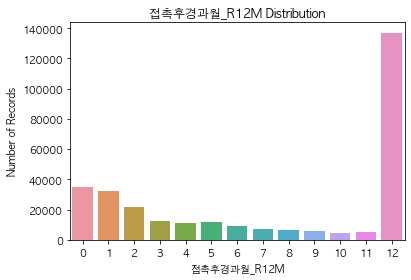

In [310]:
column_name = '접촉후경과월_R12M'
user_friendly_name = '접촉후경과월_R12M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

In [311]:
column_name = '보험콜대상월수_R12M'
user_friendly_name = '보험콜대상월수_R12M'

#Get Details
get_column_details(df,column_name)

Details of 보험콜대상월수_R12M column

DataType:  int64

There are no null values

Number of Unique Values:  8

Distribution of column:

0    182167
1     28928
2     26196
3     21376
4     18948
5     16845
6      5444
7        96
Name: 보험콜대상월수_R12M, dtype: int64


In [312]:
column_name = '보험콜대상횟수_R12M'
user_friendly_name = '보험콜대상횟수_R12M'

#Get Details
get_column_details(df,column_name)

Details of 보험콜대상횟수_R12M column

DataType:  int64

There are no null values

Number of Unique Values:  8

Distribution of column:

0    182167
1     28867
2     26145
3     21329
4     18929
5     16846
6      5550
7       167
Name: 보험콜대상횟수_R12M, dtype: int64


In [313]:
column_name = '보험콜통화횟수_R12M'
user_friendly_name = '보험콜통화횟수_R12M'

#Get Details
get_column_details(df,column_name)

Details of 보험콜통화횟수_R12M column

DataType:  int64

There are no null values

Number of Unique Values:  91

Distribution of column:

0      183764
2       12040
3       11389
1       11285
4       10721
        ...  
74          1
77          1
92          1
100         1
247         1
Name: 보험콜통화횟수_R12M, Length: 91, dtype: int64


Details of 보험콜배정후경과월_R12M column

DataType:  int64

There are no null values

Number of Unique Values:  13

Distribution of column:

12    182167
1      32879
0      27358
2      18269
4       8783
3       7870
5       6988
6       5917
7       2891
8       2148
11      1684
9       1604
10      1442
Name: 보험콜배정후경과월_R12M, dtype: int64

-----------------------------------------------------

보험콜배정후경과월_R12M Distribution


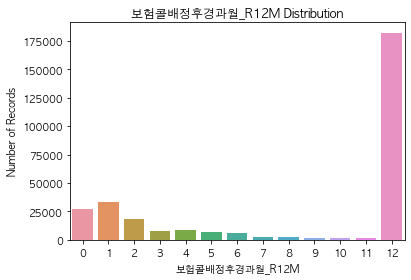

In [314]:
column_name = '보험콜배정후경과월_R12M'
user_friendly_name = '보험콜배정후경과월_R12M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

Details of 보험콜통화후경과월_R12M column

DataType:  int64

There are no null values

Number of Unique Values:  13

Distribution of column:

12    184103
1      32393
0      27111
2      18025
4       9122
3       8159
5       7107
6       4553
7       2813
8       2163
9       1571
10      1532
11      1348
Name: 보험콜통화후경과월_R12M, dtype: int64

-----------------------------------------------------

보험콜통화후경과월_R12M Distribution


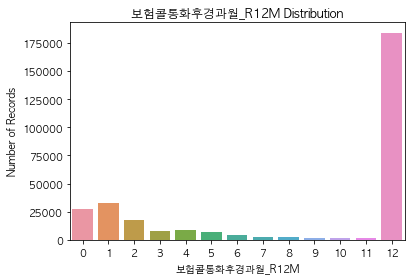

In [315]:
column_name = '보험콜통화후경과월_R12M'
user_friendly_name = '보험콜통화후경과월_R12M'

#Get Details
get_column_details(df,column_name)

# Plot Graph
plot_countplot(df,column_name,user_friendly_name)

# 5. Data Transformation

## 5-1. Label Encoding

In [316]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['자격기준','자격구분상세','연회비청구구분_B0M','거주시도명','거주시군구명','직장시도명','직장시군구명','_1순위신용체크구분','Life_Stage','이용금액대','고객구분']
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Loop through each column and apply label encoding
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [317]:
df.head()

,회원번호,남녀구분코드,연령대,연령,소지여부_신용,입회일자_신용,입회경과개월수_신용,탈회여부,회원여부_연체,수신거부여부_TM,...,캠페인접촉건수_R12M,캠페인접촉일수_R12M,캠페인접촉월수_R12M,접촉후경과월_R12M,보험콜대상월수_R12M,보험콜대상횟수_R12M,보험콜통화횟수_R12M,보험콜배정후경과월_R12M,보험콜통화후경과월_R12M,고객구분
0,YNtSN9Oa,2,60대,64,1,20140709,54,1,0,0,...,3,3,2,5,5,5,9,0,0,0
1,Rijqdlzu,1,20대,24,1,20170412,21,0,0,0,...,0,0,0,12,5,5,14,2,2,0
2,NOsf3TZS,2,40대,43,1,20170426,21,1,0,1,...,0,0,0,12,0,0,0,12,12,0
3,7IPZGTZu,2,70대,79,1,20141128,50,0,0,0,...,16,15,5,1,3,3,6,0,0,0
4,pEEsUF2u,2,80대,82,1,20120905,76,0,0,0,...,4,4,3,1,1,1,4,3,2,0


## 5-2. Outliar Handling


### 음수 값 존재하는 칼럼 핸들링
- 모두 "~이용건수"에만 존재 => **신카 친구한테 물어봐둠 : 내일(08.16)까지 답 받을 듯**

### 0 값이 대부분인 칼럼 핸들링
- 1안. 0 빼고 나머지값들에 대해 IQR 처리
- 2안. 그냥 둠 (수치들이 다 얌전?하다.....데이터 전처리된 파일을 넘겨준 것 같다...)
- 1안 2안 둘 다 해보면서 모델링 진행